In [1]:
from tf_ann_model.processing.data_management import load_dataset
train = load_dataset(file_name='AWID-CLS-R-Trn.csv')
test = load_dataset(file_name='AWID-CLS-R-Tst.csv')

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (82,86,87,103,104,105,108,109,111,113,114,124,139,141,142,143,147) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (103,104,105,108,109,111,113,114,124,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (aw

In [2]:
from tf_ann_model.processing.data_management import prepare_data

X_train, y_train = prepare_data(train, train_data=True)
X_test, y_test = prepare_data(test, train_data=False)

config.DOWNSAMPLE_DATA =  False
config.DOWNSAMPLE_DATA =  False


In [3]:
from tf_ann_model.processing.data_management import load_pipeline_keras
tf_ann_pipe = load_pipeline_keras()

C:\Users\skyst\Anaconda3\envs\tf\lib\pickle.py:1376: DtypeWarning: Columns (82,86,87,103,104,105,108,109,111,113,114,124,139,141,142,143,147) have mixed types.Specify dtype option on import or set low_memory=False.
  klass = self.find_class(module, name)
C:\Users\skyst\Anaconda3\envs\tf\lib\pickle.py:1376: DtypeWarning: Columns (103,104,105,108,109,111,113,114,124,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  klass = self.find_class(module, name)


config.DOWNSAMPLE_DATA =  False
config.DOWNSAMPLE_DATA =  False


In [4]:
y_train_pred = tf_ann_pipe.predict(X_train)
y_test_pred = tf_ann_pipe.predict(X_test)

575642/575642 [==============================] - 3s 5us/sample


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import numpy as np
from tf_ann_model.config import config
from sklearn.externals import joblib

encoder = joblib.load(config.ENCODER_PATH)
y_train = np.argmax(y_train, axis=1)
y_train = encoder.inverse_transform(y_train)
y_test = np.argmax(y_test, axis=1)
y_test = encoder.inverse_transform(y_test)

y_train_pred = encoder.inverse_transform(y_train_pred)
y_test_pred = encoder.inverse_transform(y_test_pred)

In [7]:
print(classification_report(y_train, y_train_pred))

               precision    recall  f1-score   support

     flooding       0.95      1.00      0.97     48484
impersonation       0.22      1.00      0.36     48522
    injection       1.00      1.00      1.00     65379
       normal       1.00      0.89      0.94   1633189

     accuracy                           0.90   1795574
    macro avg       0.79      0.97      0.82   1795574
 weighted avg       0.98      0.90      0.93   1795574



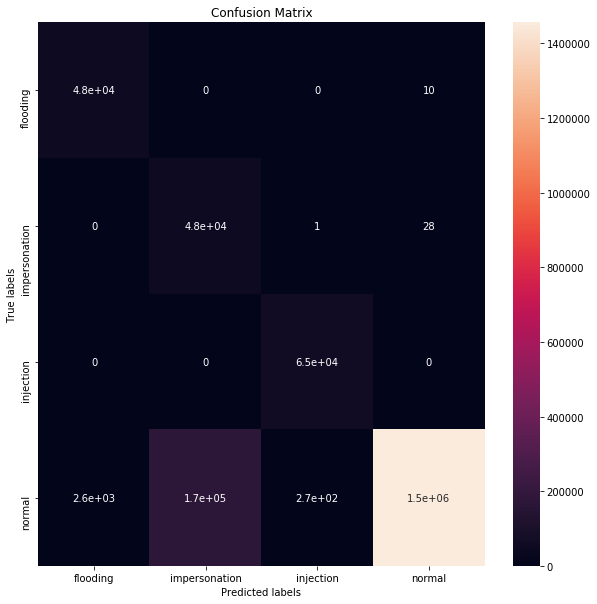

In [8]:
labels = ['flooding', 'impersonation', 'injection', 'normal']
cm = confusion_matrix(y_train, y_train_pred, labels)
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [9]:
print(classification_report(y_test, y_test_pred))

               precision    recall  f1-score   support

     flooding       0.84      0.61      0.70      8097
impersonation       0.13      0.97      0.22     20079
    injection       0.84      0.99      0.91     16682
       normal       0.99      0.74      0.85    530784

     accuracy                           0.75    575642
    macro avg       0.70      0.83      0.67    575642
 weighted avg       0.96      0.75      0.82    575642



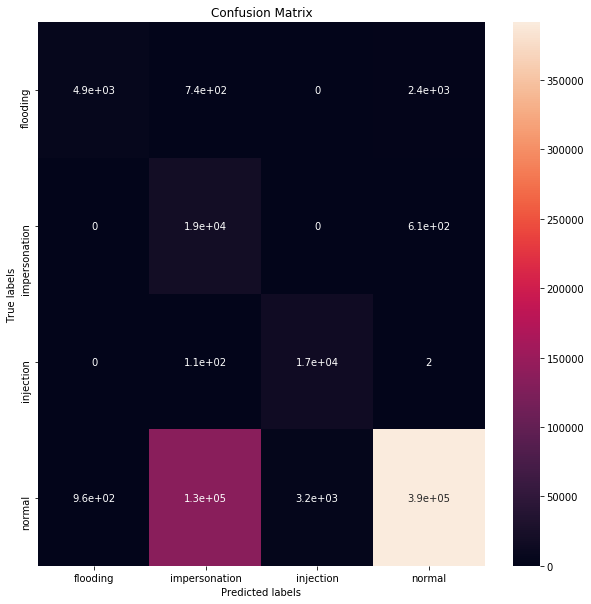

In [10]:
labels = ['flooding', 'impersonation', 'injection', 'normal']
cm = confusion_matrix(y_test, y_test_pred, labels)
plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [11]:
from sklearn.pipeline import Pipeline

data_pipe = Pipeline(tf_ann_pipe.steps[:-2])

In [12]:
test = load_dataset(file_name='AWID-CLS-R-Tst.csv')
X_test, y_test = prepare_data(test, False)
y_test = np.argmax(y_test, axis=1)
y_test = encoder.inverse_transform(y_test)

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (103,104,105,108,109,111,113,114,124,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


config.DOWNSAMPLE_DATA =  False


In [13]:
X_test_bad = X_test[y_test != y_test_pred]
y_test_bad = y_test[y_test != y_test_pred]
X_test_bad = data_pipe.transform(X_test_bad)
X_test_bad['class'] = y_test_bad
X_test_bad['frame.time_epoch'] = X_test['frame.time_epoch']

In [14]:
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

In [15]:
from tf_ann_model.processing.feat_eng_categ import one_hot_encoder
ohe = one_hot_encoder(features='class')
X_test_bad = ohe.fit_transform(X_test_bad)

In [16]:
def h(content):
    display(HTML(content))
    
def timehist(df, tcol, target, col, target_first, clipping=9999999999999999, concat_df = False, odf = None):
    if concat_df == True:
        df = pd.concat([df, odf])
        
    title = target + ' Hist ' + col
    if( target_first==True):
        df[df[target] == 1].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 3))
        df[df[target] == 0].set_index(tcol)[col].clip(0, clipping).plot(style='.', figsize=(15, 3))
        plt.title(title)
        plt.show()
    elif( target_first==False):
        df[df[target] == 0].set_index(tcol)[col].clip(0, clipping).plot(style='.', title= title, figsize=(15, 3))
        df[df[target] == 1].set_index(tcol)[col].clip(0, clipping).plot(style='.', title= title, figsize=(15, 3))
        plt.title(title)
        plt.show()

In [17]:
def _desc(data, col, label):
    d0 = data.describe().reset_index()
    d0.columns = [col, label]
    return d0.append({col:'unique values', label:data.unique().shape[0]}, ignore_index=True) \
             .append({col:'NaNs', label:data.isnull().sum()}, ignore_index=True) \
             .append({col:'NaNs share', label:np.round(data.isnull().sum() / data.shape[0], 4)}, ignore_index=True) \

def desc(df_train, col, target, include_test=False, df_test=None):
    d0 = _desc(df_train[col], col, 'Train')
    d1 = _desc(df_train.loc[df_train[target] == 1, col], col, 'Train normal')
    d2 = _desc(df_train.loc[df_train[target] == 0, col], col, 'Train not normal')
    if( include_test):
        d3 = _desc(df_test[col], col, 'Test')
        d4 = _desc(df_test.loc[df_test[target] == 1, col], col, 'Test normal')
        d5 = _desc(df_test.loc[df_test[target] == 0, col], col, 'Test not normal')
    if( include_test):
        dd = d0.merge(d1).merge(d2).merge(d3).merge(d4).merge(d5)
    else:
        dd = d0.merge(d1).merge(d2)
    display(dd)
    
    h('<b>Most popular values (NaN = -999):</b>')
    N = 10
    d0 = df_train[[target,col]].groupby(col)[target].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
    d0 = d0.head(N)
    d0 = d0.rename({'size':'Count in train (desc)','mean':'Mean target train','sum':'Sum target train'}, axis=1)
    display(d0)
    
    if( include_test):
        d1 = df_test[[target,col]].groupby(col)[target].agg(['size','mean','sum']).reset_index().sort_values('size', ascending=False).reset_index(drop=True)
        d1 = d1.head(N)
        d1 = d1.rename({'size':'Count in test (desc)','mean':'Mean target test','sum':'Sum target test'}, axis=1)
        display(d1)

In [18]:
def hist1(df,col):
    plt.figure(figsize=(15, 3))
    plt.hist(df[col], bins=70);
    plt.title('Train histogram: ' + col);
    plt.show()

In [19]:
def corr1(df,col):
    N = None #10000
    num_vars = [f for f in df.columns if df[f].dtype != 'object']
    trx = df.head(N) if N is not None else df.copy()
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val)
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))

In [20]:
def numeric(df_input, tcol_input, target_input, col_input, target_first_input, df_test, include_test):
    timehist(df=df_input, tcol=tcol_input, target=target_input, col=col_input, target_first=target_first_input, odf=df_test, concat_df=include_test)
    hist1(df_input,col_input)
    desc(df_input, col_input, target_input, include_test, df_test)
    corr1(df_input,col_input)

In [21]:
def categorical(df, col, target, df_test, include_test):
    desc(df, col, target, include_test, df_test)

In [22]:
def proc(df, tcol, target, col, target_first, df_test, include_test):
    if col not in ['isFraud','TransactionDT']:
        h('<h3 id="c_' + col + '">' + col + '</h3>' + '<a style="font-size:11px" href="#home">(Jump to top)</a>')
        categorical(df, col, target, df_test, include_test) if df[col].dtype == 'object' else numeric(df, tcol, target, col, target_first, df_test, include_test)

In [23]:
columns = list(X_test_bad.columns)
for x in ['frame.time_epoch', 'class_normal', 'class_injection', 'class_impersonation', 'class_flooding']:
    columns.remove(x)

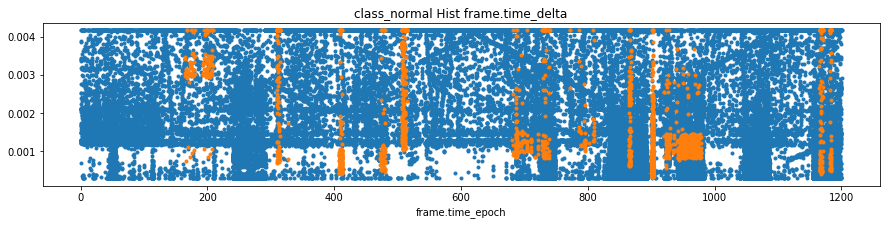

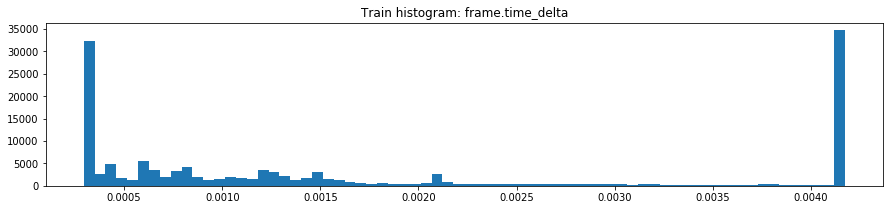

,frame.time_delta,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,0.001783,0.001786,0.001694
2,std,0.001543,0.001547,0.001388
3,min,0.000294,0.000294,0.000320
4,25%,0.000412,0.000401,0.000671
5,50%,0.001170,0.001181,0.000960
6,75%,0.003834,0.003918,0.002982
7,max,0.004172,0.004172,0.004172
8,unique values,3865.000000,3861.000000,1477.000000
9,NaNs,0.000000,0.000000,0.000000


,frame.time_delta,Count in train (desc),Mean target train,Sum target train
0,0.004172,34465,0.982504,33862
1,0.000294,20066,1.000000,20066
2,0.000302,1294,1.000000,1294
3,0.000299,1053,1.000000,1053
4,0.000295,728,1.000000,728
5,0.000298,715,1.000000,715
6,0.000303,710,1.000000,710
7,0.000301,685,1.000000,685
8,0.000300,562,1.000000,562
9,0.000296,537,1.000000,537


,Column,Correlation with frame.time_delta
0,frame.time_delta,1.000000
1,wlan_mgt.fixed.capabilities.ess,0.770415
2,wlan_mgt.tim.dtim_count,0.764830
3,wlan.fc.subtype,0.708993
4,wlan_mgt.rsn.version,0.547384
5,wlan_mgt.country_info.environment,0.277366
31,wlan.ra_passed1second_count,-0.554416
32,wlan.wep.iv_passed1second_count,-0.569901
33,wlan.fc.type_subtype,-0.733738
34,wlan.fc.type,-0.760445


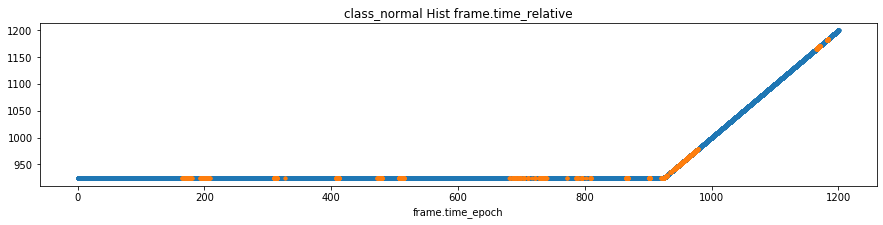

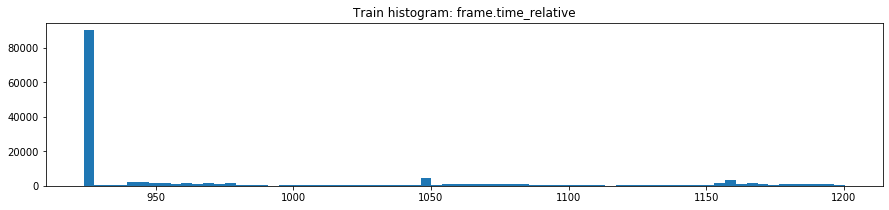

,frame.time_relative,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,974.258097,975.150793,942.486859
2,std,84.052967,84.438622,60.954563
3,min,923.778728,923.778728,923.778728
4,25%,923.778728,923.778728,923.778728
5,50%,923.778728,923.778728,923.778728
6,75%,992.863456,1006.368003,923.778728
7,max,1200.267433,1200.267433,1183.890811
8,unique values,54033.000000,53423.000000,611.000000
9,NaNs,0.000000,0.000000,0.000000


,frame.time_relative,Count in train (desc),Mean target train,Sum target train
0,923.778728,88999,0.962932,85700
1,1096.116881,1,1.000000,1
2,1095.760825,1,1.000000,1
3,1095.767037,1,1.000000,1
4,1095.780409,1,1.000000,1
5,1095.789941,1,1.000000,1
6,1095.809711,1,1.000000,1
7,1095.819650,1,1.000000,1
8,1095.849750,1,1.000000,1
9,1095.857843,1,1.000000,1


,Column,Correlation with frame.time_relative
0,frame.time_relative,1.000000
1,frame.time_epoch,0.676172
2,frame.len,0.226054
3,wlan.wep.iv_passed1second_count,0.190848
4,wlan_mgt.fixed.reason_code,0.175457
5,wlan.fc.type_subtype,0.174135
31,frame.time_delta,-0.101164
32,wlan.sa,-0.110174
33,wlan_mgt.tim.dtim_count,-0.126880
34,wlan.fc.subtype,-0.138730


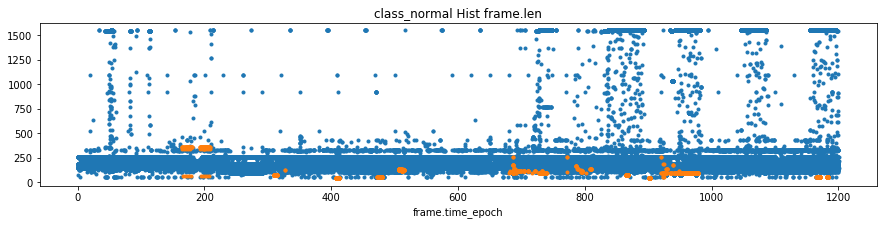

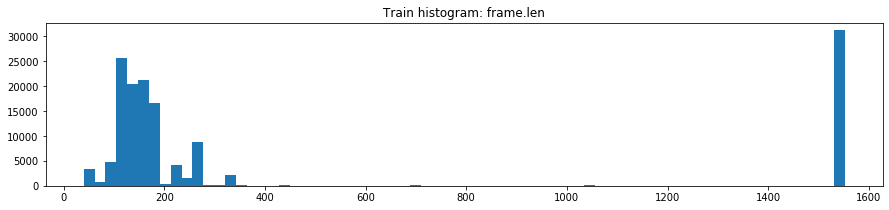

,frame.len,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,465.877334,476.808075,76.850345
2,std,579.132267,583.395369,58.463584
3,min,40.000000,54.000000,40.000000
4,25%,128.000000,128.000000,40.000000
5,50%,159.000000,159.000000,48.000000
6,75%,261.000000,292.000000,99.000000
7,max,1552.000000,1552.000000,362.000000
8,unique values,591.000000,584.000000,39.000000
9,NaNs,0.000000,0.000000,0.000000


,frame.len,Count in train (desc),Mean target train,Sum target train
0,1552.0,30643,1.000000,30643
1,118.0,17276,1.000000,17276
2,185.0,14953,1.000000,14953
3,128.0,13183,0.993476,13097
4,159.0,10000,1.000000,10000
5,148.0,9869,1.000000,9869
6,261.0,8834,1.000000,8834
7,124.0,6186,0.995474,6158
8,98.0,4114,1.000000,4114
9,214.0,3597,1.000000,3597


,Column,Correlation with frame.len
0,frame.len,1.000000
1,wlan.fc.type,0.427612
2,wlan_mgt.fixed.capabilities.cfpoll.ap,0.399631
3,wlan.fc.type_subtype,0.378602
4,wlan.wep.iv_passed1second_count,0.353257
5,frame.time_epoch,0.352448
31,wlan_mgt.rsn.version,-0.262767
32,frame.time_delta,-0.277820
33,wlan_mgt.tim.dtim_count,-0.356643
34,wlan_mgt.fixed.capabilities.ess,-0.400018


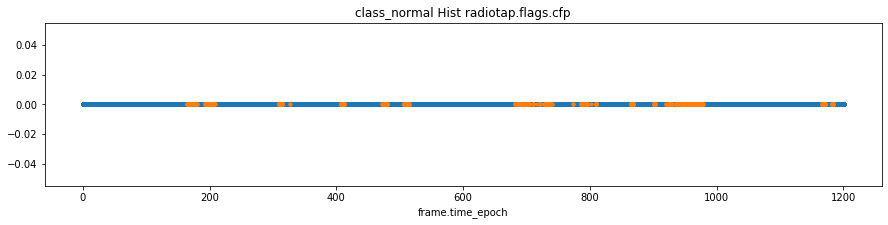

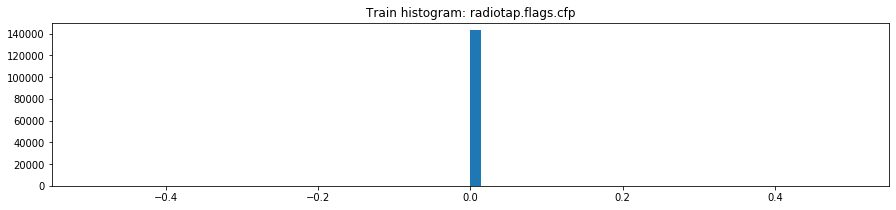

,radiotap.flags.cfp,Train,Train normal,Train not normal
0,count,143031.0,139122.0,3909.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,radiotap.flags.cfp,Count in train (desc),Mean target train,Sum target train
0,0.0,143031,0.97267,139122


,Column,Correlation with radiotap.flags.cfp
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


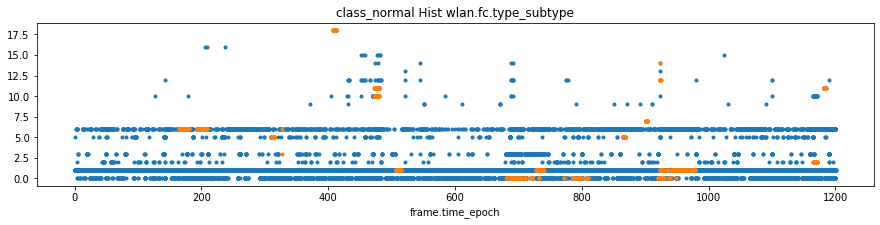

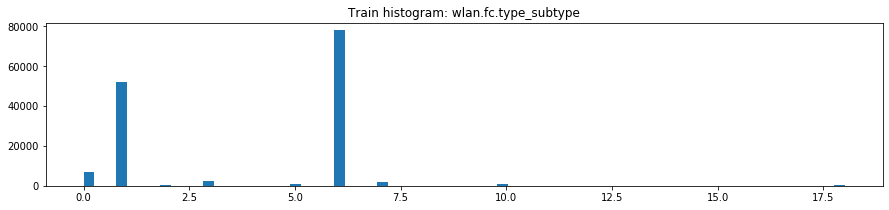

,wlan.fc.type_subtype,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,3.896624,3.854459,5.397288
2,std,2.633203,2.565166,4.148535
3,min,0.000000,0.000000,0.000000
4,25%,1.000000,1.000000,1.000000
5,50%,6.000000,6.000000,7.000000
6,75%,6.000000,6.000000,7.000000
7,max,18.000000,16.000000,18.000000
8,unique values,16.000000,14.000000,12.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.fc.type_subtype,Count in train (desc),Mean target train,Sum target train
0,6,77823,0.998522,77708
1,1,51875,0.980414,50859
2,0,6937,0.972899,6749
3,3,2279,0.999561,2278
4,7,1759,0.000000,0
5,10,955,0.969634,926
6,5,676,0.526627,356
7,2,334,0.505988,169
8,18,196,0.000000,0
9,11,116,0.017241,2


,Column,Correlation with wlan.fc.type_subtype
0,wlan.fc.type_subtype,1.000000
1,wlan_mgt.fixed.capabilities.cfpoll.ap,0.955330
2,wlan.fc.type,0.892117
3,wlan.ra_passed1second_count,0.594523
4,wlan.wep.iv_passed1second_count,0.547440
5,wlan.ta_passed1second_count,0.476741
31,wlan_mgt.rsn.version,-0.620386
32,frame.time_delta,-0.733738
33,wlan.fc.subtype,-0.780012
34,wlan_mgt.tim.dtim_count,-0.824591


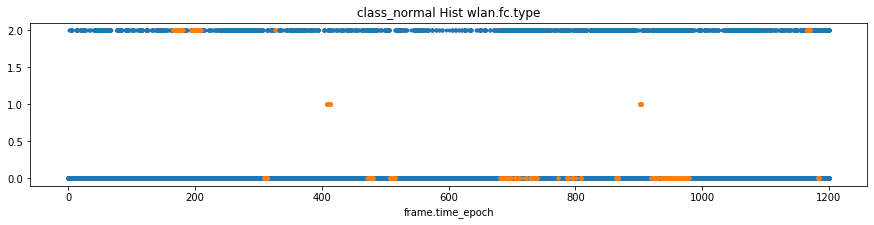

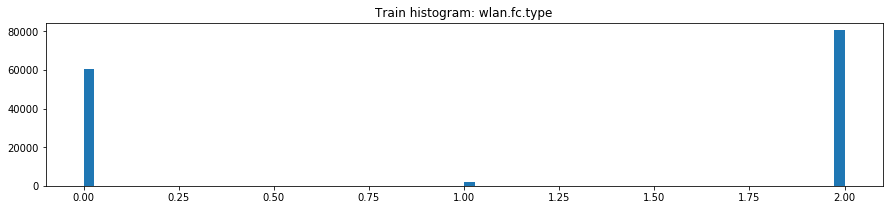

,wlan.fc.type,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,1.138641,1.152542,0.643899
2,std,0.983421,0.988300,0.610868
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,2.000000,2.000000,1.000000
6,75%,2.000000,2.000000,1.000000
7,max,2.000000,2.000000,2.000000
8,unique values,3.000000,2.000000,3.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.fc.type,Count in train (desc),Mean target train,Sum target train
0,2.0,80453,0.996507,80172
1,0.0,60623,0.972403,58950
2,1.0,1955,0.000000,0


,Column,Correlation with wlan.fc.type
0,wlan.fc.type,1.000000
1,wlan_mgt.fixed.capabilities.cfpoll.ap,0.966902
2,wlan.fc.type_subtype,0.892117
3,wlan.ra_passed1second_count,0.598775
4,wlan.wep.iv_passed1second_count,0.530971
5,wlan.da_passed1second_count,0.471723
31,wlan_mgt.rsn.version,-0.636284
32,frame.time_delta,-0.760445
33,wlan_mgt.tim.dtim_count,-0.867917
34,wlan.fc.subtype,-0.919072


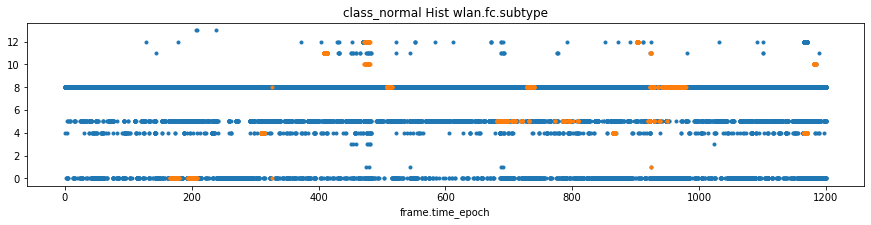

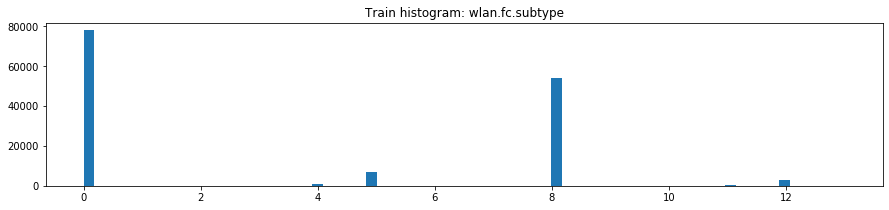

,wlan.fc.subtype,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,3.555866,3.398276,9.164492
2,std,3.993826,3.896809,3.295154
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,8.000000
5,50%,0.000000,0.000000,11.000000
6,75%,8.000000,8.000000,12.000000
7,max,13.000000,13.000000,12.000000
8,unique values,10.000000,10.000000,8.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.fc.subtype,Count in train (desc),Mean target train,Sum target train
0,0.0,77825,0.998522,77710
1,8.0,54154,0.981220,53137
2,5.0,6937,0.972899,6749
3,12.0,2731,0.345295,943
4,4.0,1010,0.519802,525
5,11.0,240,0.162500,39
6,10.0,116,0.017241,2
7,3.0,8,1.000000,8
8,1.0,7,0.857143,6
9,13.0,3,1.000000,3


,Column,Correlation with wlan.fc.subtype
0,wlan.fc.subtype,1.000000
1,wlan_mgt.fixed.capabilities.ess,0.855699
2,wlan_mgt.tim.dtim_count,0.834121
3,frame.time_delta,0.708993
4,wlan_mgt.rsn.version,0.580127
5,wlan_mgt.fixed.timestamp,0.301258
31,wlan.wep.iv_passed1second_count,-0.513119
32,wlan.ra_passed1second_count,-0.533735
33,wlan.fc.type_subtype,-0.780012
34,wlan_mgt.fixed.capabilities.cfpoll.ap,-0.855127


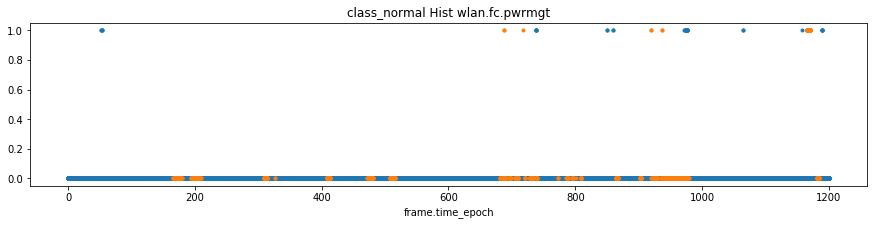

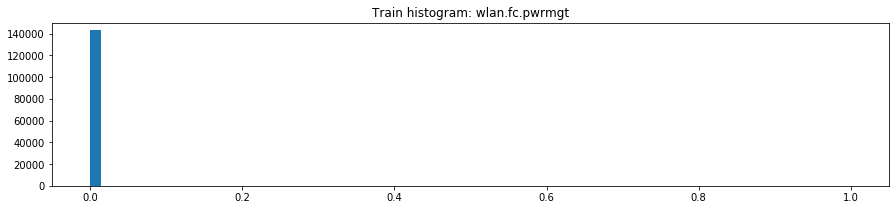

,wlan.fc.pwrmgt,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,0.001475,0.000280,0.044001
2,std,0.038380,0.016741,0.205124
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000
6,75%,0.000000,0.000000,0.000000
7,max,1.000000,1.000000,1.000000
8,unique values,2.000000,2.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.fc.pwrmgt,Count in train (desc),Mean target train,Sum target train
0,0.0,142820,0.973834,139083
1,1.0,211,0.184834,39


,Column,Correlation with wlan.fc.pwrmgt
0,wlan.fc.pwrmgt,1.000000
1,class_flooding,0.198000
2,wlan.duration,0.084126
3,frame.time_relative,0.070091
4,frame.time_epoch,0.041435
5,wlan.fc.type,0.031073
31,wlan.ra_passed1second_count,-0.025741
32,frame.len,-0.026415
33,wlan_mgt.tim.dtim_count,-0.028812
34,wlan_mgt.fixed.capabilities.ess,-0.029536


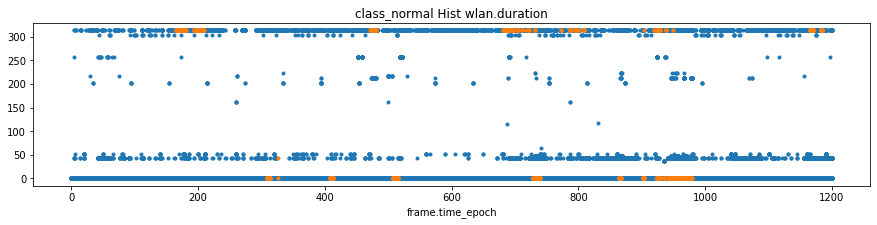

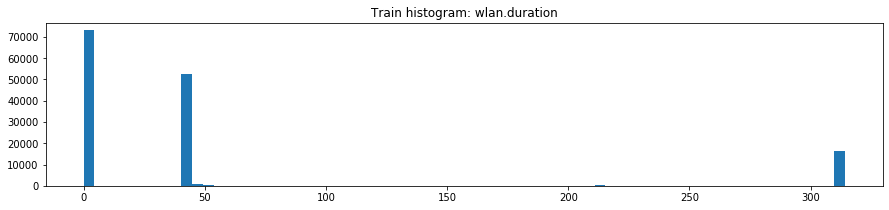

,wlan.duration,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,52.878830,52.971708,49.573292
2,std,96.503788,95.948449,114.493742
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000
6,75%,44.000000,44.000000,0.000000
7,max,314.000000,314.000000,314.000000
8,unique values,16.000000,16.000000,3.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.duration,Count in train (desc),Mean target train,Sum target train
0,0.0,73001,0.954918,69710
1,44.0,52373,0.999981,52372
2,314.0,16166,0.961833,15549
3,48.0,668,1.000000,668
4,52.0,252,1.000000,252
5,213.0,186,1.000000,186
6,304.0,141,1.000000,141
7,258.0,127,1.000000,127
8,202.0,67,1.000000,67
9,218.0,18,1.000000,18


,Column,Correlation with wlan.duration
0,wlan.duration,1.000000
1,wlan.ta_passed1second_count,0.242066
2,wlan_mgt.fixed.reason_code,0.220516
3,frame.time_epoch,0.195855
4,wlan_mgt.fixed.capabilities.cfpoll.ap,0.182056
5,wlan.fc.type,0.148009
31,wlan.fc.subtype,-0.144785
32,wlan.sa,-0.147303
33,wlan_mgt.fixed.capabilities.ess,-0.181958
34,wlan_mgt.rsn.version,-0.216880


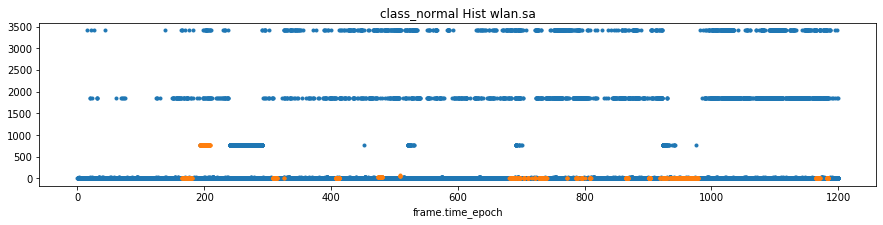

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


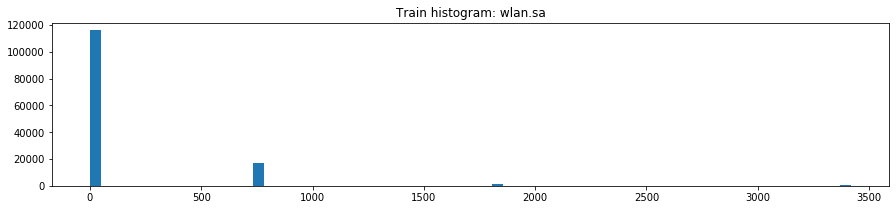

,wlan.sa,Train,Train normal,Train not normal
0,count,135133.000000,131854.000000,3279.000000
1,mean,144.848179,147.917014,21.445258
2,std,414.850032,419.169829,107.813846
3,min,0.000000,0.000000,2.000000
4,25%,1.000000,1.000000,5.000000
5,50%,3.000000,2.000000,5.000000
6,75%,17.000000,17.000000,5.000000
7,max,3419.000000,3419.000000,767.000000
8,unique values,37.000000,31.000000,14.000000
9,NaNs,7898.000000,7268.000000,630.000000


,wlan.sa,Count in train (desc),Mean target train,Sum target train
0,1.0,43020,1.000000,43020
1,17.0,21096,1.000000,21096
2,767.0,16803,0.996013,16736
3,2.0,14294,0.951378,13599
4,4.0,10163,1.000000,10163
5,0.0,9929,1.000000,9929
6,7.0,6988,1.000000,6988
7,6.0,3832,1.000000,3832
8,5.0,1955,0.000000,0
9,1848.0,1536,1.000000,1536


,Column,Correlation with wlan.sa
0,wlan.sa,1.000000
1,wlan.bssid,0.755706
2,wlan.da_passed1second_count,0.385832
3,wlan_mgt.country_info.environment,0.280559
4,wlan.ra_passed1second_count,0.188928
5,wlan.fc.type,0.090934
31,wlan.fc.subtype,-0.103313
32,frame.time_relative,-0.110174
33,wlan.duration,-0.147303
34,frame.len,-0.195378


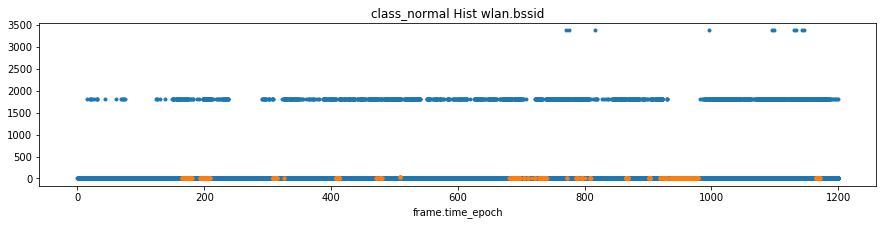

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


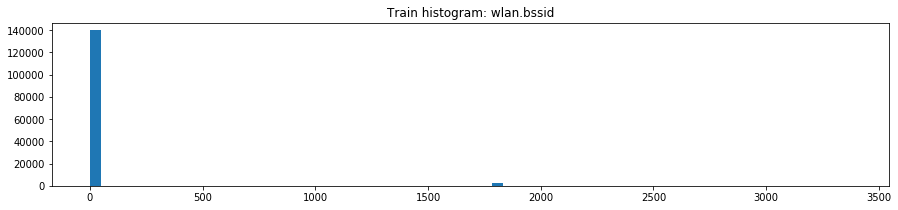

,wlan.bssid,Train,Train normal,Train not normal
0,count,142239.000000,139054.000000,3185.000000
1,mean,33.760438,34.446992,3.786185
2,std,239.404819,242.087435,1.861353
3,min,0.000000,0.000000,2.000000
4,25%,1.000000,1.000000,2.000000
5,50%,1.000000,1.000000,4.000000
6,75%,2.000000,2.000000,4.000000
7,max,3376.000000,3376.000000,42.000000
8,unique values,26.000000,20.000000,10.000000
9,NaNs,792.000000,68.000000,724.000000


,wlan.bssid,Count in train (desc),Mean target train,Sum target train
0,1.0,77312,1.000000,77312
1,2.0,27139,0.967169,26248
2,3.0,10198,0.998725,10185
3,0.0,10190,1.000000,10190
4,6.0,6988,1.000000,6988
5,5.0,3832,1.000000,3832
6,4.0,1955,0.000000,0
7,1815.0,1536,1.000000,1536
8,1816.0,920,1.000000,920
9,7.0,618,0.480583,297


,Column,Correlation with wlan.bssid
0,wlan.bssid,1.000000
1,wlan.sa,0.755706
2,wlan_mgt.country_info.environment,0.552608
3,frame.time_delta,0.189545
4,wlan_mgt.tim.dtim_count,0.166686
5,wlan_mgt.fixed.capabilities.ess,0.162749
31,wlan.ra_passed1second_count,-0.106384
32,wlan.wep.iv_passed1second_count,-0.111459
33,wlan.fc.type_subtype,-0.152401
34,wlan.fc.type,-0.158193


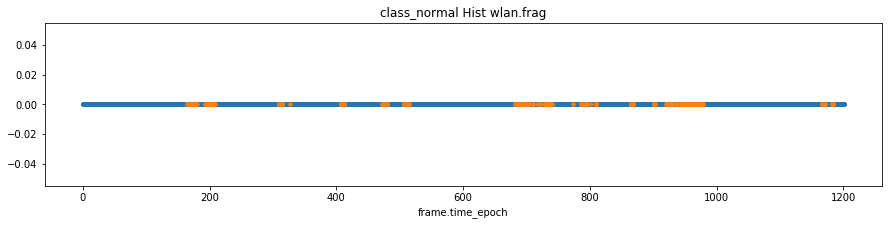

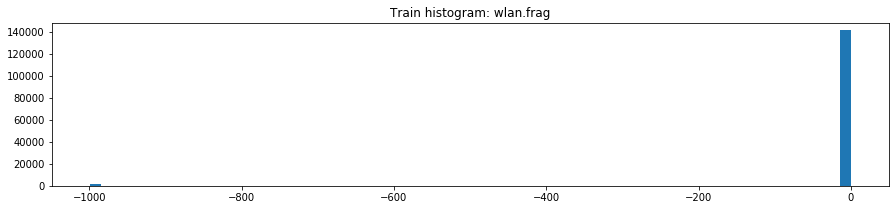

,wlan.frag,Train,Train normal,Train not normal
0,count,143031.000000,139122.0,3909.000000
1,mean,-13.654697,0.0,-499.627782
2,std,115.994335,0.0,499.563887
3,min,-999.000000,0.0,-999.000000
4,25%,0.000000,0.0,-999.000000
5,50%,0.000000,0.0,-999.000000
6,75%,0.000000,0.0,0.000000
7,max,0.000000,0.0,0.000000
8,unique values,2.000000,1.0,2.000000
9,NaNs,0.000000,0.0,0.000000


,wlan.frag,Count in train (desc),Mean target train,Sum target train
0,0.0,141076,0.986149,139122
1,-999.0,1955,0.000000,0


,Column,Correlation with wlan.frag
0,wlan.frag,1.000000
1,class_normal,0.702283
2,wlan.seq,0.286468
3,wlan_mgt.fixed.capabilities.ess,0.098397
4,wlan_mgt.tim.dtim_count,0.088242
5,frame.len,0.086405
31,wlan.fc.type_subtype,-0.188041
32,wlan.ta_passed1second_count_change,-0.202891
33,wlan.ta_passed1second_count,-0.242179
34,wlan.fc.subtype,-0.245939


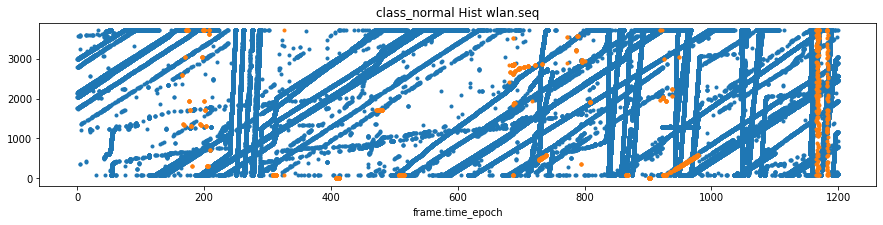

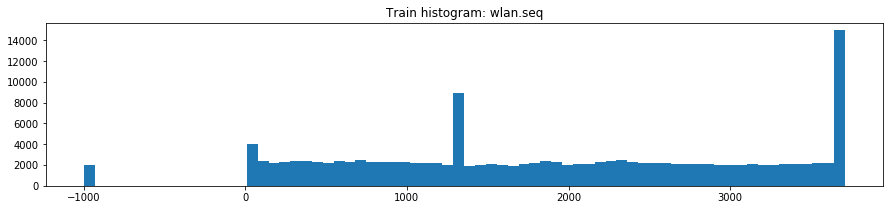

,wlan.seq,Train,Train normal,Train not normal
0,count,143031.00000,139122.000000,3909.000000
1,mean,1912.53401,1968.900641,-93.564339
2,std,1196.44757,1146.697365,1201.305335
3,min,-999.00000,76.000000,-999.000000
4,25%,944.00000,1014.000000,-999.000000
5,50%,1870.00000,1917.000000,-999.000000
6,75%,2973.00000,3001.000000,94.000000
7,max,3708.00000,3708.000000,3708.000000
8,unique values,3634.00000,3633.000000,625.000000
9,NaNs,0.00000,0.000000,0.000000


,wlan.seq,Count in train (desc),Mean target train,Sum target train
0,3708.0,12469,0.995188,12409
1,1293.0,6919,1.000000,6919
2,76.0,3996,0.759760,3036
3,-999.0,1955,0.000000,0
4,1703.0,83,0.289157,24
5,2846.0,57,0.807018,46
6,2845.0,53,0.735849,39
7,913.0,52,1.000000,52
8,2253.0,52,1.000000,52
9,2177.0,52,1.000000,52


,Column,Correlation with wlan.seq
0,wlan.seq,1.000000
1,wlan.frag,0.286468
2,class_normal,0.281057
3,wlan_mgt.fixed.reason_code,0.116061
4,frame.len,0.082879
5,frame.time_relative,0.076403
31,wlan_mgt.fixed.capabilities.cfpoll.ap,-0.062232
32,wlan.ta_passed1second_count,-0.071111
33,wlan.da_passed1second_count,-0.075855
34,wlan_mgt.fixed.timestamp,-0.124769


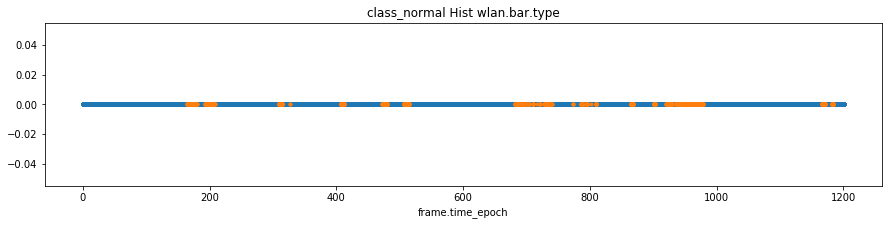

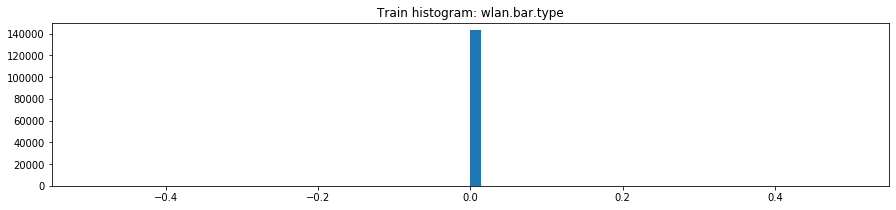

,wlan.bar.type,Train,Train normal,Train not normal
0,count,143031.0,139122.0,3909.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan.bar.type,Count in train (desc),Mean target train,Sum target train
0,0,143031,0.97267,139122


,Column,Correlation with wlan.bar.type
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


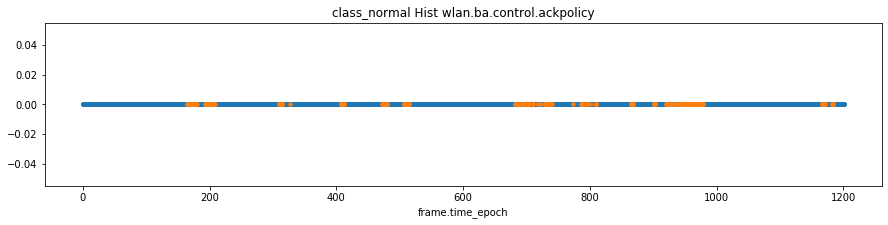

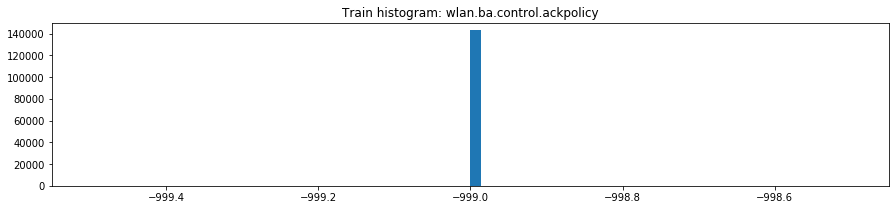

,wlan.ba.control.ackpolicy,Train,Train normal,Train not normal
0,count,143031.0,139122.0,3909.0
1,mean,-999.0,-999.0,-999.0
2,std,0.0,0.0,0.0
3,min,-999.0,-999.0,-999.0
4,25%,-999.0,-999.0,-999.0
5,50%,-999.0,-999.0,-999.0
6,75%,-999.0,-999.0,-999.0
7,max,-999.0,-999.0,-999.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan.ba.control.ackpolicy,Count in train (desc),Mean target train,Sum target train
0,-999.0,143031,0.97267,139122


,Column,Correlation with wlan.ba.control.ackpolicy
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


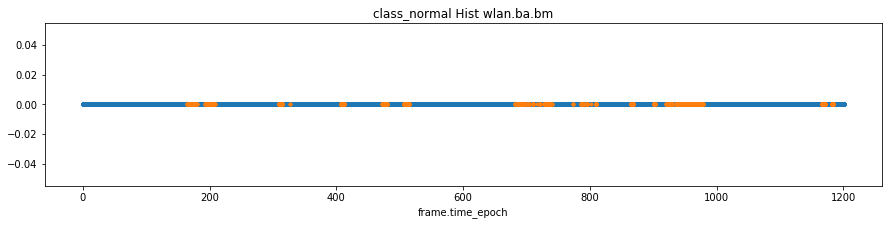

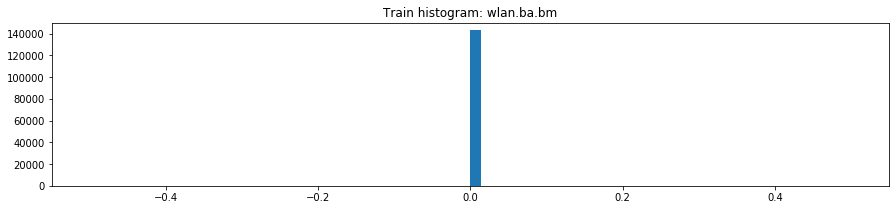

,wlan.ba.bm,Train,Train normal,Train not normal
0,count,143031.0,139122.0,3909.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan.ba.bm,Count in train (desc),Mean target train,Sum target train
0,0,143031,0.97267,139122


,Column,Correlation with wlan.ba.bm
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


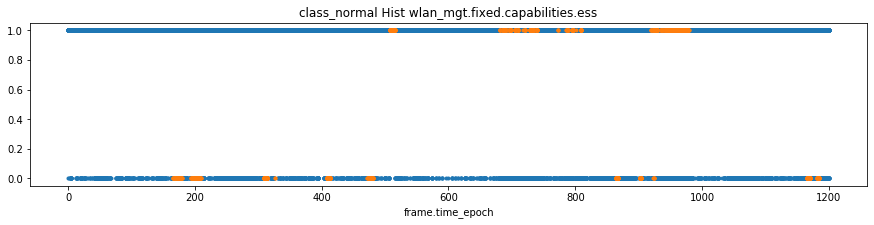

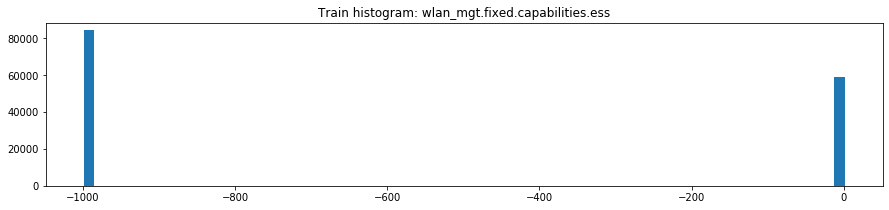

,wlan_mgt.fixed.capabilities.ess,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,-587.697555,-584.802389,-690.737017
2,std,492.071577,492.584708,461.834906
3,min,-999.000000,-999.000000,-999.000000
4,25%,-999.000000,-999.000000,-999.000000
5,50%,-999.000000,-999.000000,-999.000000
6,75%,1.000000,1.000000,1.000000
7,max,1.000000,1.000000,1.000000
8,unique values,2.000000,2.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan_mgt.fixed.capabilities.ess,Count in train (desc),Mean target train,Sum target train
0,-999.0,84202,0.967887,81498
1,1.0,58829,0.979517,57624


,Column,Correlation with wlan_mgt.fixed.capabilities.ess
0,wlan_mgt.fixed.capabilities.ess,1.000000
1,wlan_mgt.fixed.timestamp,0.992644
2,wlan_mgt.tim.dtim_count,0.896799
3,wlan.fc.subtype,0.855699
4,frame.time_delta,0.770415
5,wlan_mgt.rsn.version,0.657457
31,wlan.wep.iv_passed1second_count,-0.546834
32,wlan.ra_passed1second_count,-0.610765
33,wlan.fc.type_subtype,-0.955689
34,wlan.fc.type,-0.967795


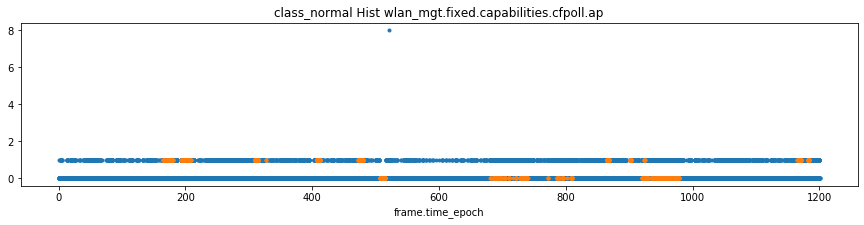

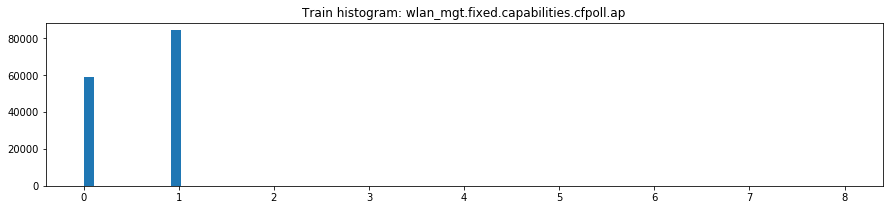

,wlan_mgt.fixed.capabilities.cfpoll.ap,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,0.588753,0.585860,0.691737
2,std,0.492459,0.492983,0.461835
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,1.000000,1.000000,1.000000
6,75%,1.000000,1.000000,1.000000
7,max,8.000000,8.000000,1.000000
8,unique values,3.000000,3.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan_mgt.fixed.capabilities.cfpoll.ap,Count in train (desc),Mean target train,Sum target train
0,1,84202,0.967887,81498
1,0,58828,0.979517,57623
2,8,1,1.000000,1


,Column,Correlation with wlan_mgt.fixed.capabilities.cfpoll.ap
0,wlan_mgt.fixed.capabilities.cfpoll.ap,1.000000
1,wlan.fc.type,0.966902
2,wlan.fc.type_subtype,0.955330
3,wlan.ra_passed1second_count,0.610190
4,wlan.wep.iv_passed1second_count,0.546282
5,wlan.ta_passed1second_count,0.489967
31,frame.time_delta,-0.769633
32,wlan.fc.subtype,-0.855127
33,wlan_mgt.tim.dtim_count,-0.896178
34,wlan_mgt.fixed.timestamp,-0.973487


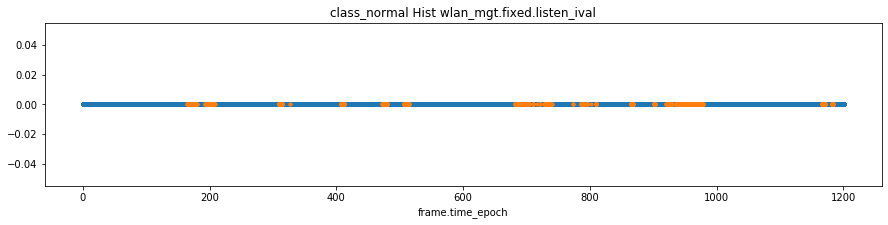

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


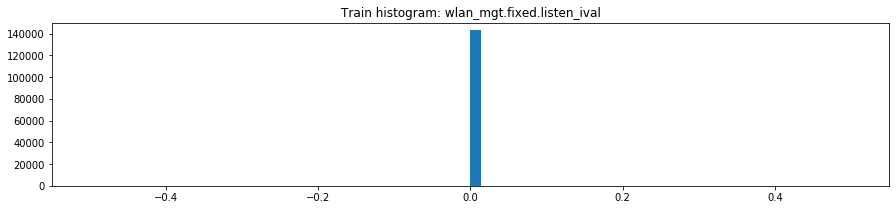

,wlan_mgt.fixed.listen_ival,Train,Train normal,Train not normal
0,count,143029.0,139120.0,3909.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,2.0,2.0,1.0
9,NaNs,2.0,2.0,0.0


,wlan_mgt.fixed.listen_ival,Count in train (desc),Mean target train,Sum target train
0,0.0,143029,0.97267,139120


,Column,Correlation with wlan_mgt.fixed.listen_ival
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


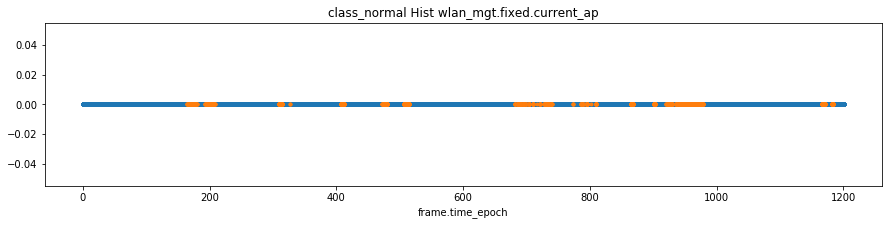

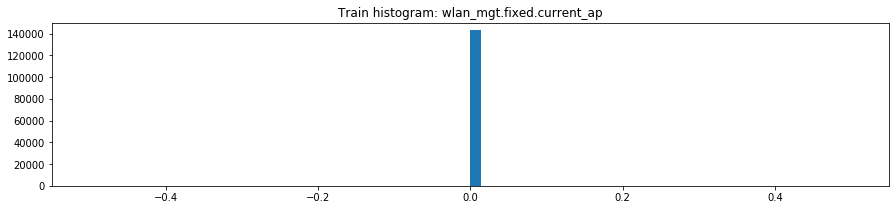

,wlan_mgt.fixed.current_ap,Train,Train normal,Train not normal
0,count,143031.0,139122.0,3909.0
1,mean,0.0,0.0,0.0
2,std,0.0,0.0,0.0
3,min,0.0,0.0,0.0
4,25%,0.0,0.0,0.0
5,50%,0.0,0.0,0.0
6,75%,0.0,0.0,0.0
7,max,0.0,0.0,0.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.fixed.current_ap,Count in train (desc),Mean target train,Sum target train
0,0,143031,0.97267,139122


,Column,Correlation with wlan_mgt.fixed.current_ap
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


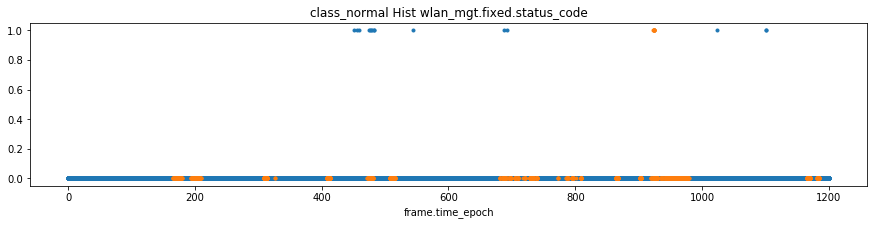

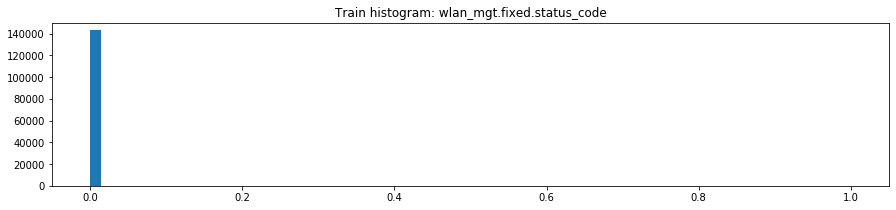

,wlan_mgt.fixed.status_code,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,0.000154,0.000115,0.001535
2,std,0.012401,0.010724,0.039153
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000
6,75%,0.000000,0.000000,0.000000
7,max,1.000000,1.000000,1.000000
8,unique values,2.000000,2.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan_mgt.fixed.status_code,Count in train (desc),Mean target train,Sum target train
0,0,143009,0.972708,139106
1,1,22,0.727273,16


,Column,Correlation with wlan_mgt.fixed.status_code
0,wlan_mgt.fixed.status_code,1.000000
1,wlan_mgt.fixed.aid,0.353545
2,class_impersonation,0.051054
3,wlan.fc.type_subtype,0.046305
4,wlan.duration,0.031726
5,wlan_mgt.fixed.capabilities.ess,0.006819
31,wlan.da_passed1second_count,-0.008539
32,wlan_mgt.tim.dtim_count,-0.009297
33,wlan.ra_passed1second_count,-0.010106
34,wlan.fc.type,-0.014361


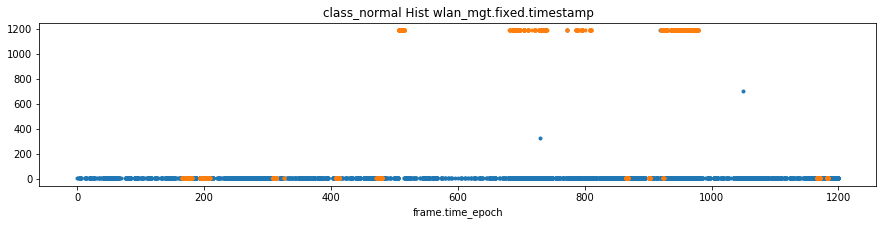

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


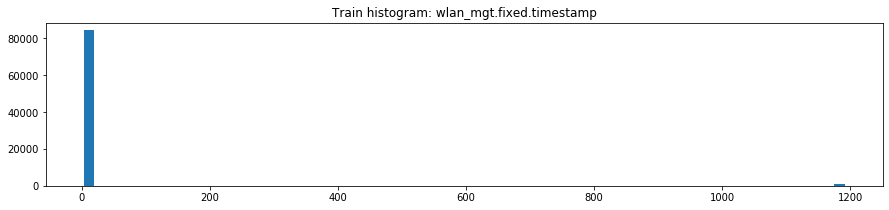

,wlan_mgt.fixed.timestamp,Train,Train normal,Train not normal
0,count,85427.000000,81518.000000,3909.000000
1,mean,19.783312,3.041660,368.912510
2,std,140.177980,6.471719,548.533563
3,min,3.000000,3.000000,3.000000
4,25%,3.000000,3.000000,3.000000
5,50%,3.000000,3.000000,3.000000
6,75%,3.000000,3.000000,1191.000000
7,max,1191.000000,1191.000000,1191.000000
8,unique values,5.000000,5.000000,2.000000
9,NaNs,57604.000000,57604.000000,0.000000


,wlan_mgt.fixed.timestamp,Count in train (desc),Mean target train,Sum target train
0,3.0,84219,0.967881,81514
1,1191.0,1206,0.001658,2
2,324.0,1,1.000000,1
3,702.0,1,1.000000,1


,Column,Correlation with wlan_mgt.fixed.timestamp
0,wlan_mgt.fixed.timestamp,1.000000
1,wlan_mgt.fixed.capabilities.ess,0.992644
2,class_impersonation,0.702092
3,wlan_mgt.tim.dtim_count,0.701932
4,wlan.fc.subtype,0.301258
5,class_flooding,0.290256
29,wlan.ra_passed1second_count,-0.133815
30,wlan.fc.type_subtype,-0.537073
31,class_normal,-0.545400
32,wlan.fc.type,-0.578855


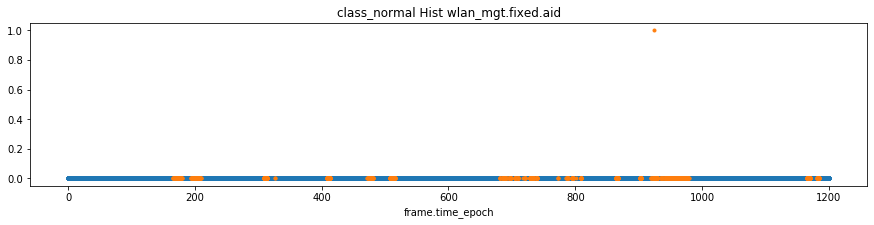

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


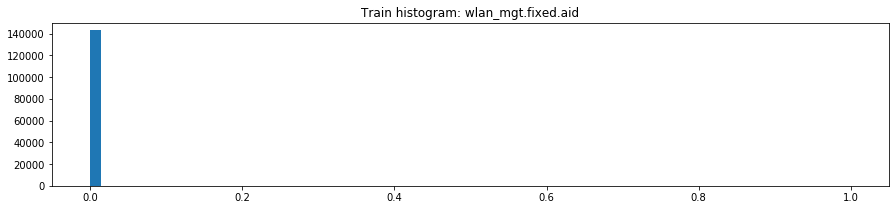

,wlan_mgt.fixed.aid,Train,Train normal,Train not normal
0,count,143017.000000,139108.0000,3909.000000
1,mean,0.000007,0.0000,0.000256
2,std,0.002644,0.0000,0.015994
3,min,0.000000,0.0000,0.000000
4,25%,0.000000,0.0000,0.000000
5,50%,0.000000,0.0000,0.000000
6,75%,0.000000,0.0000,0.000000
7,max,1.000000,0.0000,1.000000
8,unique values,3.000000,2.0000,2.000000
9,NaNs,14.000000,14.0000,0.000000


,wlan_mgt.fixed.aid,Count in train (desc),Mean target train,Sum target train
0,0.0,143016,0.972674,139108
1,1.0,1,0.000000,0


,Column,Correlation with wlan_mgt.fixed.aid
0,wlan_mgt.fixed.aid,1.000000
1,wlan_mgt.fixed.status_code,0.353545
2,class_impersonation,0.040369
3,wlan.fc.type_subtype,0.010155
4,wlan.duration,0.007158
5,wlan.ta_passed1second_count_change,0.006192
31,wlan_mgt.tim.dtim_count,-0.001982
32,wlan.ra_passed1second_count,-0.002198
33,wlan.fc.type,-0.003062
34,wlan_mgt.fixed.capabilities.cfpoll.ap,-0.003162


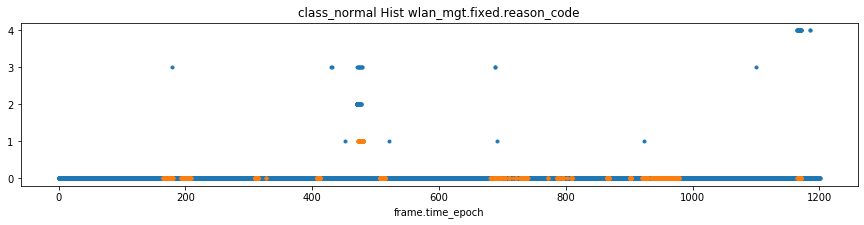

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


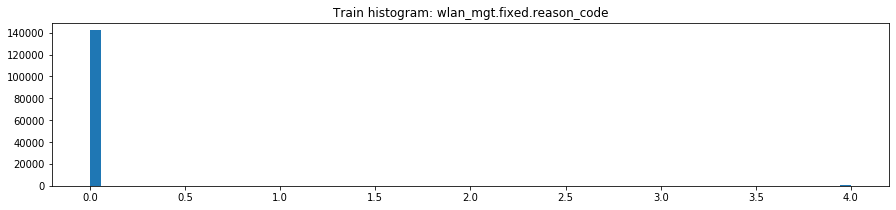

,wlan_mgt.fixed.reason_code,Train,Train normal,Train not normal
0,count,142944.000000,139119.000000,3825.000000
1,mean,0.025583,0.025863,0.015425
2,std,0.314644,0.318280,0.123251
3,min,0.000000,0.000000,0.000000
4,25%,0.000000,0.000000,0.000000
5,50%,0.000000,0.000000,0.000000
6,75%,0.000000,0.000000,0.000000
7,max,4.000000,4.000000,1.000000
8,unique values,6.000000,6.000000,3.000000
9,NaNs,87.000000,3.000000,84.000000


,wlan_mgt.fixed.reason_code,Count in train (desc),Mean target train,Sum target train
0,0.0,141960,0.973471,138194
1,4.0,869,1.000000,869
2,1.0,63,0.063492,4
3,2.0,38,1.000000,38
4,3.0,14,1.000000,14


,Column,Correlation with wlan_mgt.fixed.reason_code
0,wlan_mgt.fixed.reason_code,1.000000
1,wlan.duration,0.220516
2,wlan.fc.type_subtype,0.189276
3,frame.time_relative,0.175457
4,wlan.fc.subtype,0.171658
5,wlan.seq,0.116061
31,frame.time_delta,-0.046438
32,frame.len,-0.057573
33,wlan_mgt.tim.dtim_count,-0.060979
34,wlan_mgt.fixed.capabilities.ess,-0.067999


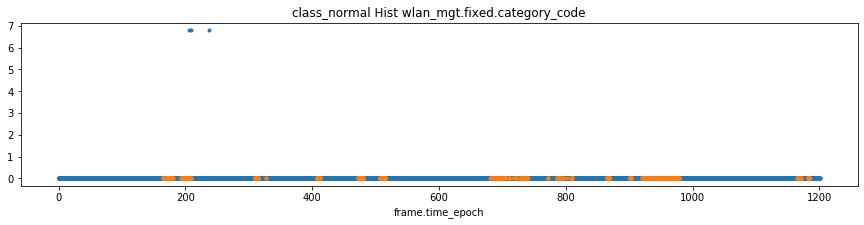

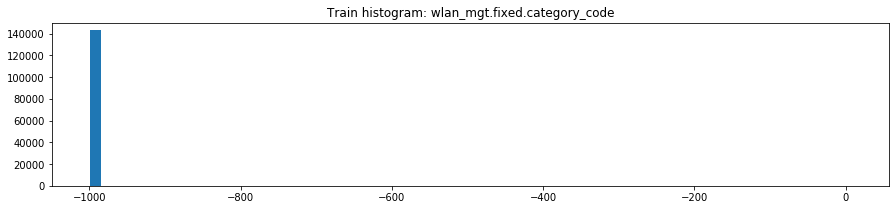

,wlan_mgt.fixed.category_code,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.0
1,mean,-998.978904,-998.978311,-999.0
2,std,4.606320,4.670584,0.0
3,min,-999.000000,-999.000000,-999.0
4,25%,-999.000000,-999.000000,-999.0
5,50%,-999.000000,-999.000000,-999.0
6,75%,-999.000000,-999.000000,-999.0
7,max,6.800000,6.800000,-999.0
8,unique values,2.000000,2.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan_mgt.fixed.category_code,Count in train (desc),Mean target train,Sum target train
0,-999.0,143028,0.97267,139119
1,6.8,3,1.00000,3


,Column,Correlation with wlan_mgt.fixed.category_code
0,wlan_mgt.fixed.category_code,1.000000
1,wlan_mgt.fixed.htact,1.000000
2,wlan.fc.type_subtype,0.021051
3,wlan.duration,0.012392
4,wlan.fc.subtype,0.010830
5,wlan_mgt.fixed.capabilities.cfpoll.ap,0.003825
31,wlan_mgt.fixed.capabilities.ess,-0.003828
32,wlan.wep.iv_passed1second_count,-0.004653
33,wlan.fc.type,-0.005303
34,frame.time_epoch,-0.006918


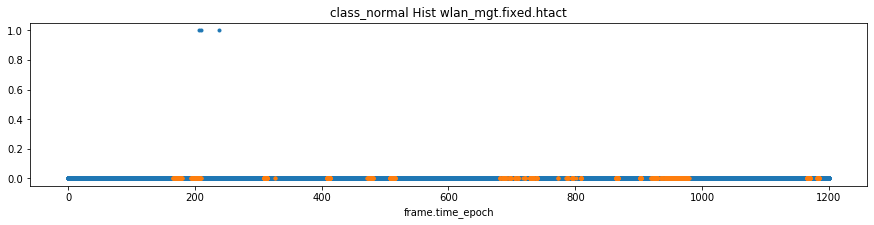

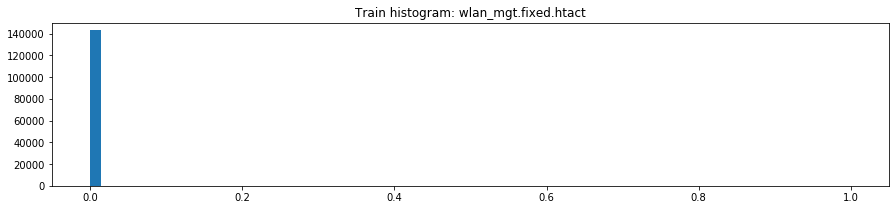

,wlan_mgt.fixed.htact,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.0
1,mean,0.000021,0.000022,0.0
2,std,0.004580,0.004644,0.0
3,min,0.000000,0.000000,0.0
4,25%,0.000000,0.000000,0.0
5,50%,0.000000,0.000000,0.0
6,75%,0.000000,0.000000,0.0
7,max,1.000000,1.000000,0.0
8,unique values,2.000000,2.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan_mgt.fixed.htact,Count in train (desc),Mean target train,Sum target train
0,0,143028,0.97267,139119
1,1,3,1.00000,3


,Column,Correlation with wlan_mgt.fixed.htact
0,wlan_mgt.fixed.category_code,1.000000
1,wlan_mgt.fixed.htact,1.000000
2,wlan.fc.type_subtype,0.021051
3,wlan.duration,0.012392
4,wlan.fc.subtype,0.010830
5,wlan_mgt.fixed.capabilities.cfpoll.ap,0.003825
31,wlan_mgt.fixed.capabilities.ess,-0.003828
32,wlan.wep.iv_passed1second_count,-0.004653
33,wlan.fc.type,-0.005303
34,frame.time_epoch,-0.006918


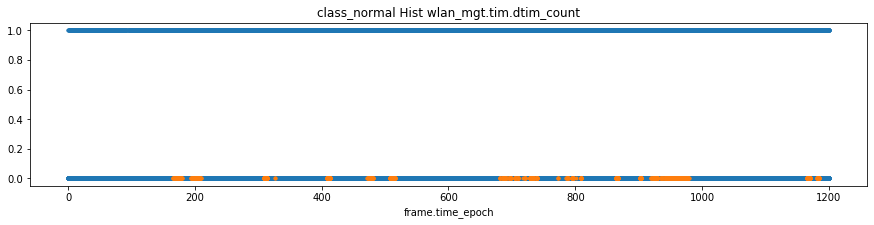

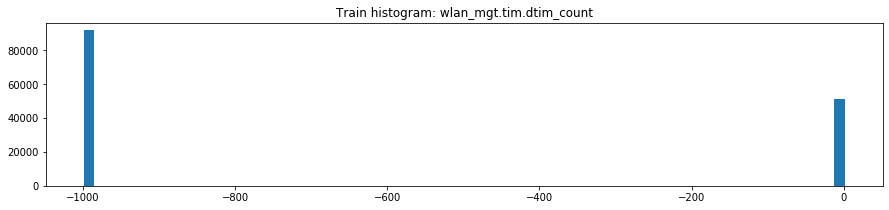

,wlan_mgt.tim.dtim_count,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,-639.554964,-633.756674,-845.917114
2,std,479.517545,481.174701,359.900776
3,min,-999.000000,-999.000000,-999.000000
4,25%,-999.000000,-999.000000,-999.000000
5,50%,-999.000000,-999.000000,-999.000000
6,75%,0.000000,0.000000,-999.000000
7,max,1.000000,1.000000,0.000000
8,unique values,3.000000,3.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan_mgt.tim.dtim_count,Count in train (desc),Mean target train,Sum target train
0,-999.0,91575,0.963855,88265
1,0.0,44217,0.986453,43618
2,1.0,7239,1.000000,7239


,Column,Correlation with wlan_mgt.tim.dtim_count
0,wlan_mgt.tim.dtim_count,1.000000
1,wlan_mgt.fixed.capabilities.ess,0.896799
2,wlan.fc.subtype,0.834121
3,frame.time_delta,0.764830
4,wlan_mgt.fixed.timestamp,0.701932
5,wlan_mgt.rsn.version,0.646001
31,wlan.wep.iv_passed1second_count,-0.515274
32,wlan.ra_passed1second_count,-0.552987
33,wlan.fc.type_subtype,-0.824591
34,wlan.fc.type,-0.867917


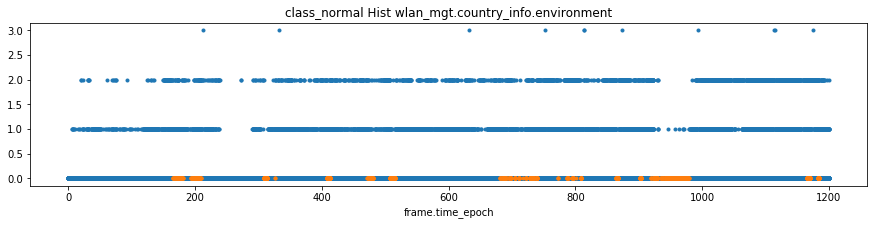

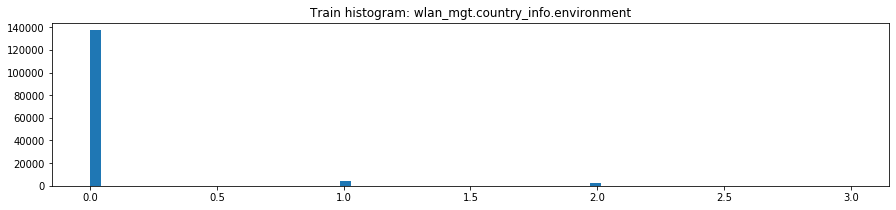

,wlan_mgt.country_info.environment,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.0
1,mean,0.056016,0.057590,0.0
2,std,0.286902,0.290749,0.0
3,min,0.000000,0.000000,0.0
4,25%,0.000000,0.000000,0.0
5,50%,0.000000,0.000000,0.0
6,75%,0.000000,0.000000,0.0
7,max,3.000000,3.000000,0.0
8,unique values,4.000000,4.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan_mgt.country_info.environment,Count in train (desc),Mean target train,Sum target train
0,0,137113,0.971491,133204
1,1,3835,1.000000,3835
2,2,2072,1.000000,2072
3,3,11,1.000000,11


,Column,Correlation with wlan_mgt.country_info.environment
0,wlan_mgt.country_info.environment,1.000000
1,wlan.bssid,0.552608
2,wlan_mgt.rsn.version,0.349049
3,wlan.sa,0.280559
4,frame.time_delta,0.277366
5,wlan_mgt.fixed.capabilities.ess,0.233585
30,wlan.wep.iv_passed1second_count,-0.154451
31,wlan.ra_passed1second_count,-0.154589
32,wlan.fc.type_subtype,-0.220080
33,wlan.fc.type,-0.226062


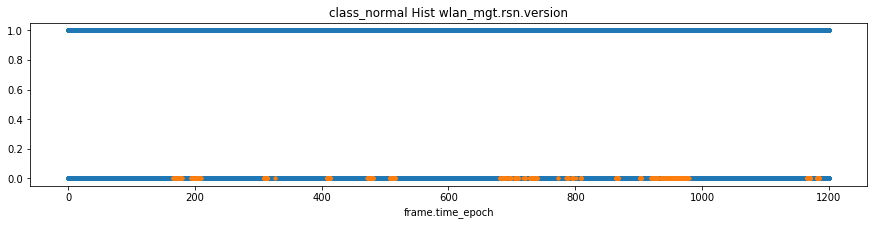

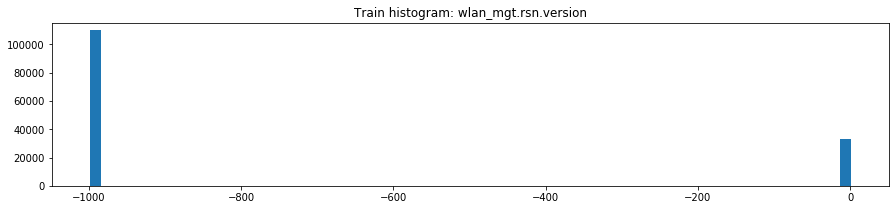

,wlan_mgt.rsn.version,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.0
1,mean,-767.050283,-760.533043,-999.0
2,std,422.078537,426.147595,0.0
3,min,-999.000000,-999.000000,-999.0
4,25%,-999.000000,-999.000000,-999.0
5,50%,-999.000000,-999.000000,-999.0
6,75%,-999.000000,-999.000000,-999.0
7,max,1.000000,1.000000,-999.0
8,unique values,2.000000,2.000000,1.0
9,NaNs,0.000000,0.000000,0.0


,wlan_mgt.rsn.version,Count in train (desc),Mean target train,Sum target train
0,-999.0,109855,0.964417,105946
1,1.0,33176,1.000000,33176


,Column,Correlation with wlan_mgt.rsn.version
0,wlan_mgt.rsn.version,1.000000
1,wlan_mgt.fixed.capabilities.ess,0.657457
2,wlan_mgt.tim.dtim_count,0.646001
3,wlan.fc.subtype,0.580127
4,frame.time_delta,0.547384
5,wlan_mgt.country_info.environment,0.349049
30,wlan.ta_passed1second_count,-0.396437
31,wlan.ra_passed1second_count,-0.410613
32,wlan.fc.type_subtype,-0.620386
33,wlan.fc.type,-0.636284


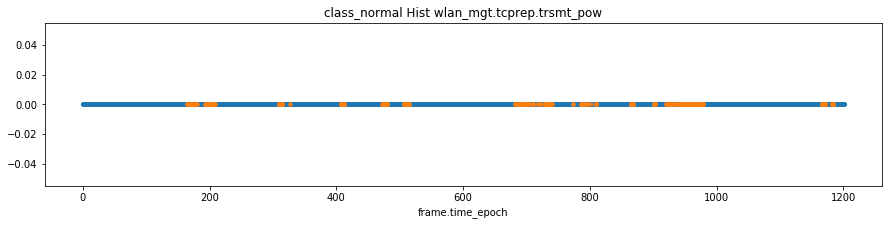

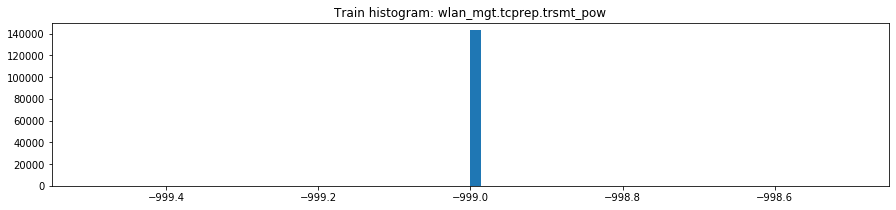

,wlan_mgt.tcprep.trsmt_pow,Train,Train normal,Train not normal
0,count,143031.0,139122.0,3909.0
1,mean,-999.0,-999.0,-999.0
2,std,0.0,0.0,0.0
3,min,-999.0,-999.0,-999.0
4,25%,-999.0,-999.0,-999.0
5,50%,-999.0,-999.0,-999.0
6,75%,-999.0,-999.0,-999.0
7,max,-999.0,-999.0,-999.0
8,unique values,1.0,1.0,1.0
9,NaNs,0.0,0.0,0.0


,wlan_mgt.tcprep.trsmt_pow,Count in train (desc),Mean target train,Sum target train
0,-999.0,143031,0.97267,139122


,Column,Correlation with wlan_mgt.tcprep.trsmt_pow
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


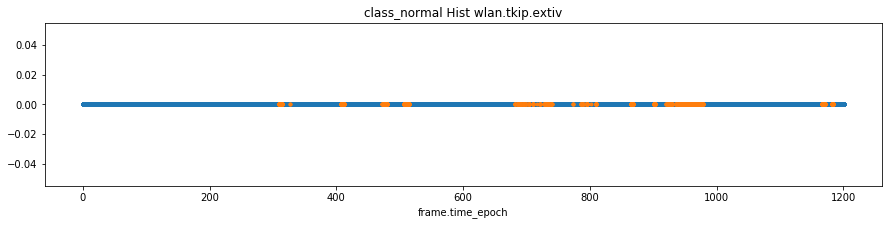

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


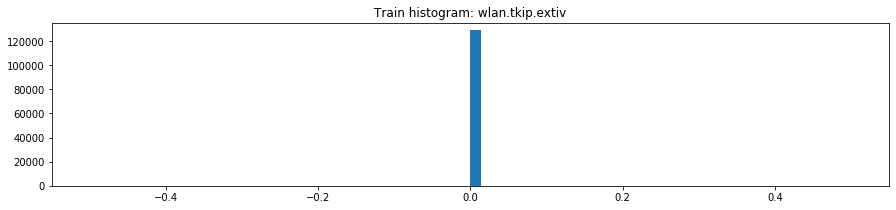

,wlan.tkip.extiv,Train,Train normal,Train not normal
0,count,128802.0000,125007.0000,3795.0000
1,mean,0.0000,0.0000,0.0000
2,std,0.0000,0.0000,0.0000
3,min,0.0000,0.0000,0.0000
4,25%,0.0000,0.0000,0.0000
5,50%,0.0000,0.0000,0.0000
6,75%,0.0000,0.0000,0.0000
7,max,0.0000,0.0000,0.0000
8,unique values,2.0000,2.0000,2.0000
9,NaNs,14229.0000,14115.0000,114.0000


,wlan.tkip.extiv,Count in train (desc),Mean target train,Sum target train
0,0.0,128802,0.970536,125007


,Column,Correlation with wlan.tkip.extiv
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


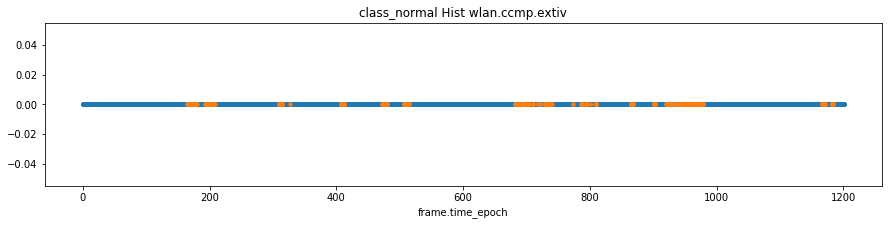

C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\skyst\Anaconda3\envs\tf\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


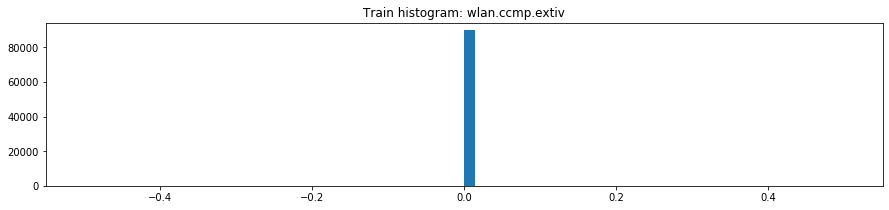

,wlan.ccmp.extiv,Train,Train normal,Train not normal
0,count,89750.0000,85841.000,3909.0
1,mean,0.0000,0.000,0.0
2,std,0.0000,0.000,0.0
3,min,0.0000,0.000,0.0
4,25%,0.0000,0.000,0.0
5,50%,0.0000,0.000,0.0
6,75%,0.0000,0.000,0.0
7,max,0.0000,0.000,0.0
8,unique values,2.0000,2.000,1.0
9,NaNs,53281.0000,53281.000,0.0


,wlan.ccmp.extiv,Count in train (desc),Mean target train,Sum target train
0,0.0,89750,0.956446,85841


,Column,Correlation with wlan.ccmp.extiv
0,frame.time_delta,NaN
1,frame.time_relative,NaN
2,frame.len,NaN
3,radiotap.flags.cfp,NaN
4,wlan.fc.type_subtype,NaN
5,wlan.fc.type,NaN


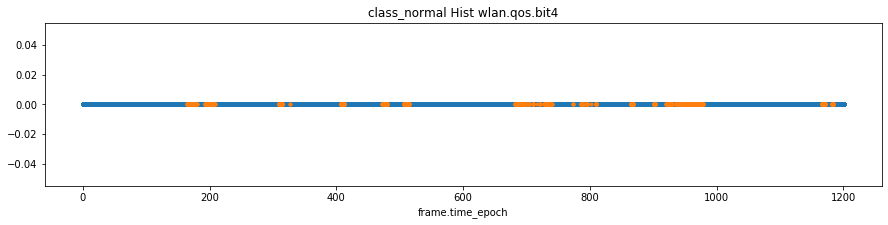

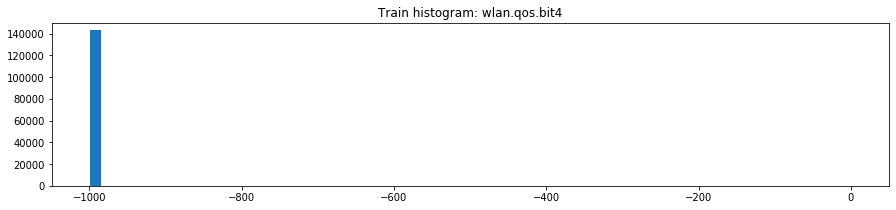

,wlan.qos.bit4,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,-997.302767,-997.262259,-998.744436
2,std,41.142040,41.629268,15.978377
3,min,-999.000000,-999.000000,-999.000000
4,25%,-999.000000,-999.000000,-999.000000
5,50%,-999.000000,-999.000000,-999.000000
6,75%,-999.000000,-999.000000,-999.000000
7,max,0.000000,0.000000,0.000000
8,unique values,2.000000,2.000000,2.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.qos.bit4,Count in train (desc),Mean target train,Sum target train
0,-999.0,142788,0.972631,138880
1,0.0,243,0.995885,242


,Column,Correlation with wlan.qos.bit4
0,wlan.qos.bit4,1.000000
1,wlan.fc.subtype,0.045905
2,wlan.fc.type,0.036133
3,wlan_mgt.fixed.capabilities.cfpoll.ap,0.034450
4,class_normal,0.005874
5,wlan.frag,0.004856
31,wlan_mgt.tim.dtim_count,-0.030923
32,wlan.ta_passed1second_count,-0.032026
33,wlan.ra_passed1second_count,-0.034283
34,wlan_mgt.fixed.capabilities.ess,-0.034482


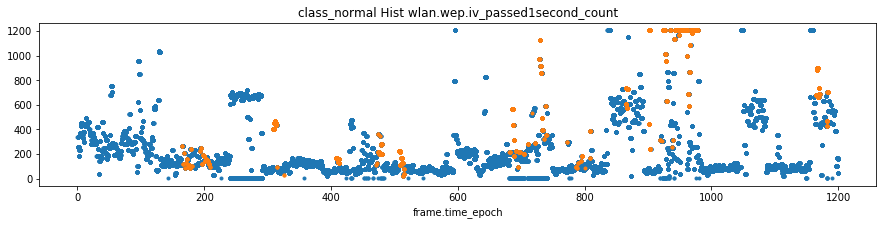

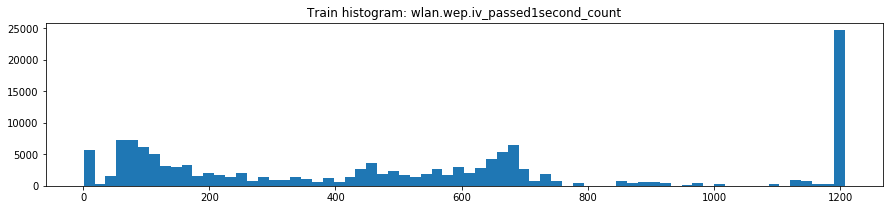

,wlan.wep.iv_passed1second_count,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,527.723102,523.195260,688.869788
2,std,402.604134,400.342416,447.298614
3,min,1.000000,1.000000,21.000000
4,25%,137.000000,132.000000,225.000000
5,50%,494.000000,494.000000,532.000000
6,75%,702.000000,697.000000,1207.000000
7,max,1207.000000,1207.000000,1207.000000
8,unique values,472.000000,472.000000,106.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.wep.iv_passed1second_count,Count in train (desc),Mean target train,Sum target train
0,1207.0,24666,0.939958,23185
1,1.0,5688,1.000000,5688
2,683.0,1148,1.000000,1148
3,664.0,1088,1.000000,1088
4,660.0,956,1.000000,956
5,702.0,942,0.958599,903
6,674.0,929,1.000000,929
7,600.0,920,1.000000,920
8,665.0,903,0.965670,872
9,560.0,775,1.000000,775


,Column,Correlation with wlan.wep.iv_passed1second_count
0,wlan.wep.iv_passed1second_count,1.000000
1,wlan.ra_passed1second_count,0.633897
2,wlan.ta_passed1second_count,0.552960
3,wlan.fc.type_subtype,0.547440
4,wlan_mgt.fixed.capabilities.cfpoll.ap,0.546282
5,wlan.fc.type,0.530971
31,wlan_mgt.rsn.version,-0.383560
32,wlan.fc.subtype,-0.513119
33,wlan_mgt.tim.dtim_count,-0.515274
34,wlan_mgt.fixed.capabilities.ess,-0.546834


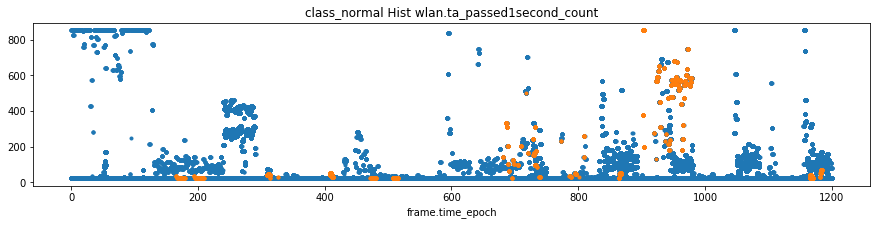

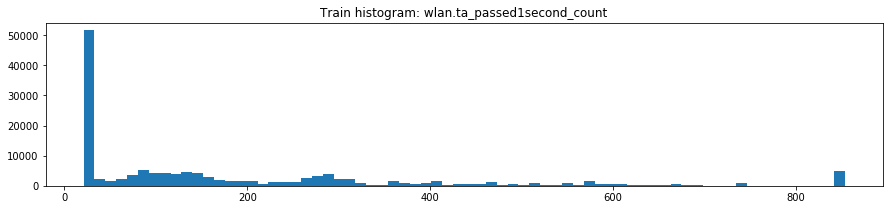

,wlan.ta_passed1second_count,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,184.769022,179.303223,379.297774
2,std,210.894288,202.757958,354.098332
3,min,21.000000,21.000000,21.000000
4,25%,21.000000,21.000000,37.000000
5,50%,106.000000,106.000000,277.000000
6,75%,281.000000,278.000000,853.000000
7,max,853.000000,853.000000,853.000000
8,unique values,377.000000,375.000000,94.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.ta_passed1second_count,Count in train (desc),Mean target train,Sum target train
0,21.0,48012,0.983317,47211
1,853.0,4985,0.758275,3780
2,287.0,861,1.000000,861
3,278.0,834,1.000000,834
4,269.0,807,1.000000,807
5,106.0,756,1.000000,756
6,736.0,736,1.000000,736
7,97.0,728,0.982143,715
8,119.0,717,1.000000,717
9,569.0,716,0.987430,707


,Column,Correlation with wlan.ta_passed1second_count
0,wlan.ta_passed1second_count,1.000000
1,wlan.ra_passed1second_count,0.738994
2,wlan.da_passed1second_count,0.679447
3,wlan.wep.iv_passed1second_count,0.552960
4,wlan_mgt.fixed.capabilities.cfpoll.ap,0.489967
5,wlan.fc.type_subtype,0.476741
31,wlan.fc.subtype,-0.372853
32,wlan_mgt.rsn.version,-0.396437
33,frame.time_delta,-0.426618
34,wlan_mgt.tim.dtim_count,-0.455144


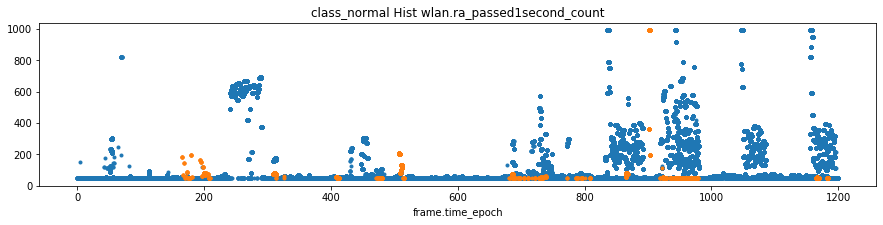

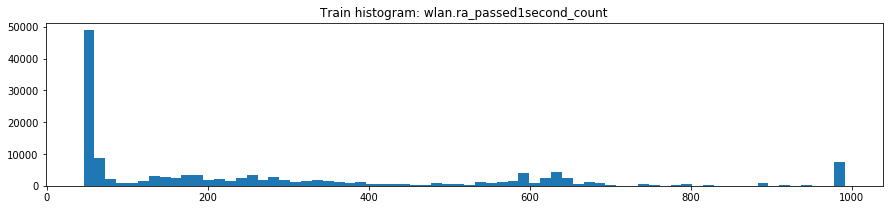

,wlan.ra_passed1second_count,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,275.822563,272.455507,395.656690
2,std,276.547314,271.203376,407.350012
3,min,46.000000,46.000000,46.000000
4,25%,51.000000,51.000000,53.000000
5,50%,167.000000,166.000000,193.000000
6,75%,445.000000,430.000000,991.000000
7,max,991.000000,991.000000,991.000000
8,unique values,370.000000,367.000000,39.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.ra_passed1second_count,Count in train (desc),Mean target train,Sum target train
0,46.0,27064,0.969147,26229
1,991.0,7641,0.842298,6436
2,49.0,2207,1.000000,2207
3,50.0,2200,0.997727,2195
4,48.0,2085,0.967386,2017
5,47.0,2023,0.997034,2017
6,52.0,1930,0.990155,1911
7,53.0,1874,0.947705,1776
8,51.0,1665,0.976577,1626
9,58.0,1504,0.995346,1497


,Column,Correlation with wlan.ra_passed1second_count
0,wlan.ra_passed1second_count,1.000000
1,wlan.da_passed1second_count,0.843802
2,wlan.ta_passed1second_count,0.738994
3,wlan.wep.iv_passed1second_count,0.633897
4,wlan_mgt.fixed.capabilities.cfpoll.ap,0.610190
5,wlan.fc.type,0.598775
31,wlan_mgt.rsn.version,-0.410613
32,wlan.fc.subtype,-0.533735
33,wlan_mgt.tim.dtim_count,-0.552987
34,frame.time_delta,-0.554416


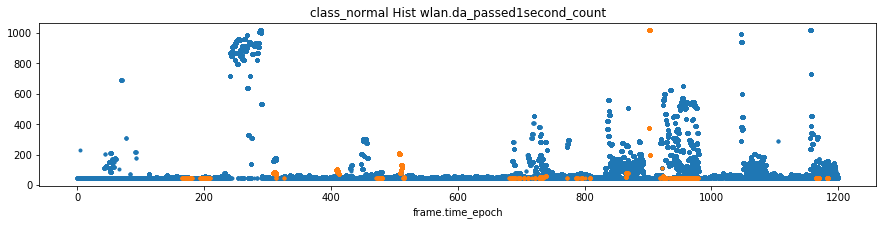

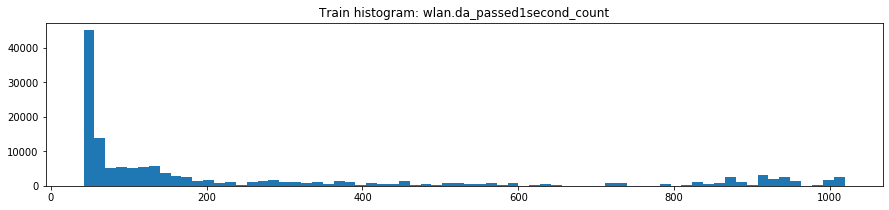

,wlan.da_passed1second_count,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,256.848676,252.667774,405.647736
2,std,307.302400,302.480899,419.944611
3,min,42.000000,42.000000,42.000000
4,25%,50.000000,50.000000,48.000000
5,50%,103.000000,102.000000,196.000000
6,75%,334.000000,320.000000,1019.000000
7,max,1019.000000,1019.000000,1019.000000
8,unique values,308.000000,307.000000,37.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.da_passed1second_count,Count in train (desc),Mean target train,Sum target train
0,42.0,20192,0.957756,19339
1,1019.0,2628,0.541476,1423
2,49.0,2284,1.000000,2284
3,50.0,2273,0.994281,2260
4,48.0,2181,0.992205,2164
5,52.0,2127,0.991067,2108
6,46.0,2114,0.992904,2099
7,45.0,2012,0.981113,1974
8,47.0,1976,0.980263,1937
9,53.0,1823,0.995612,1815


,Column,Correlation with wlan.da_passed1second_count
0,wlan.da_passed1second_count,1.000000
1,wlan.ra_passed1second_count,0.843802
2,wlan.ta_passed1second_count,0.679447
3,wlan_mgt.fixed.capabilities.cfpoll.ap,0.483879
4,wlan.fc.type_subtype,0.471983
5,wlan.fc.type,0.471723
31,wlan_mgt.rsn.version,-0.328459
32,wlan.fc.subtype,-0.408065
33,wlan_mgt.tim.dtim_count,-0.435647
34,frame.time_delta,-0.440464


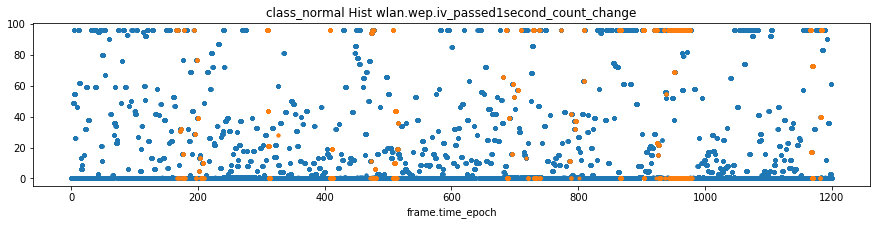

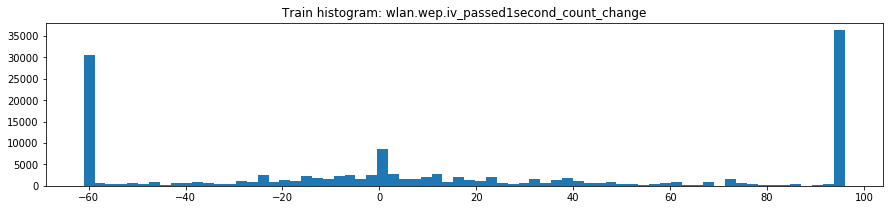

,wlan.wep.iv_passed1second_count_change,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,15.523208,14.637512,47.045280
2,std,58.812236,58.467662,62.262024
3,min,-61.000000,-61.000000,-61.000000
4,25%,-38.000000,-39.000000,-12.000000
5,50%,4.000000,3.000000,96.000000
6,75%,96.000000,90.000000,96.000000
7,max,96.000000,96.000000,96.000000
8,unique values,150.000000,150.000000,52.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.wep.iv_passed1second_count_change,Count in train (desc),Mean target train,Sum target train
0,96.0,35860,0.938204,33644
1,-61.0,30075,0.980150,29478
2,1.0,7396,1.000000,7396
3,-2.0,1616,1.000000,1616
4,-16.0,1573,0.969485,1525
5,-8.0,1318,1.000000,1318
6,0.0,1274,0.960754,1224
7,12.0,1271,1.000000,1271
8,16.0,1236,0.991100,1225
9,5.0,1197,0.994987,1191


,Column,Correlation with wlan.wep.iv_passed1second_count_change
0,wlan.wep.iv_passed1second_count_change,1.000000
1,wlan.ra_passed1second_count_change,0.645849
2,wlan.ta_passed1second_count_change,0.542627
3,wlan.ta_passed1second_count,0.233534
4,wlan.wep.iv_passed1second_count,0.223172
5,wlan.ra_passed1second_count,0.181506
31,wlan_mgt.rsn.version,-0.097956
32,wlan.frag,-0.113711
33,frame.time_delta,-0.124805
34,wlan_mgt.fixed.capabilities.ess,-0.131737


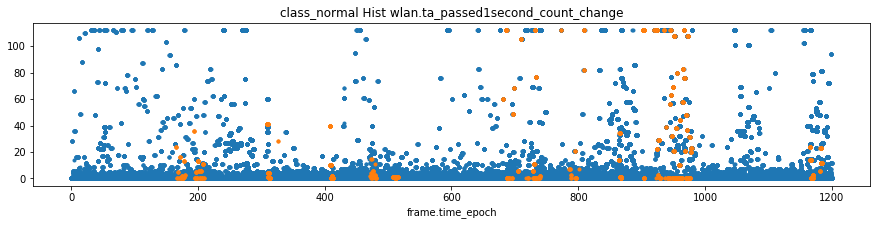

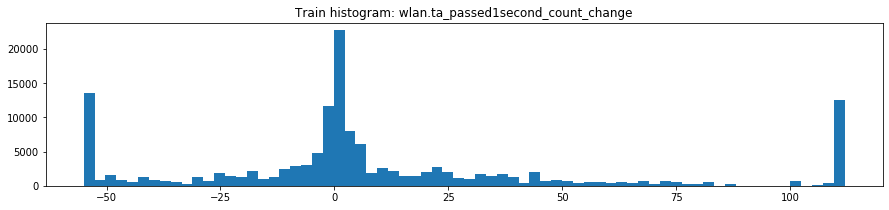

,wlan.ta_passed1second_count_change,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,9.882683,8.828985,47.383986
2,std,43.607533,42.582082,60.018563
3,min,-55.000000,-55.000000,-55.000000
4,25%,-9.000000,-9.000000,1.000000
5,50%,1.000000,1.000000,24.000000
6,75%,23.000000,22.000000,112.000000
7,max,112.000000,112.000000,112.000000
8,unique values,152.000000,152.000000,70.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.ta_passed1second_count_change,Count in train (desc),Mean target train,Sum target train
0,-55.0,13115,0.975600,12795
1,112.0,12518,0.867870,10864
2,1.0,8628,0.924548,7977
3,0.0,7820,0.991049,7750
4,-1.0,6828,0.986380,6735
5,2.0,6240,0.987500,6162
6,-2.0,4859,0.999588,4857
7,3.0,4361,0.992204,4327
8,4.0,3596,0.986096,3546
9,-3.0,2691,0.991081,2667


,Column,Correlation with wlan.ta_passed1second_count_change
0,wlan.ta_passed1second_count_change,1.000000
1,wlan.ra_passed1second_count_change,0.751133
2,wlan.wep.iv_passed1second_count_change,0.542627
3,wlan.ta_passed1second_count,0.299526
4,wlan.ra_passed1second_count,0.221760
5,wlan.wep.iv_passed1second_count,0.218550
31,frame.time_delta,-0.133646
32,class_normal,-0.144152
33,wlan_mgt.tim.dtim_count,-0.150198
34,wlan_mgt.fixed.capabilities.ess,-0.150479


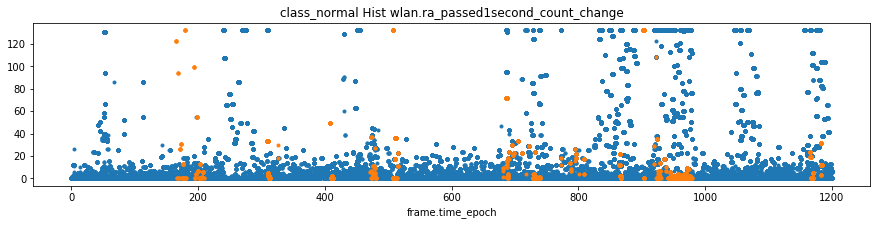

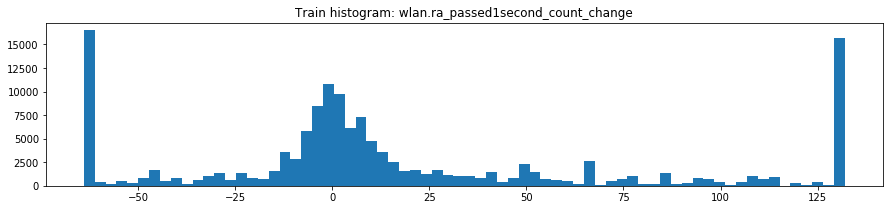

,wlan.ra_passed1second_count_change,Train,Train normal,Train not normal
0,count,143031.000000,139122.000000,3909.000000
1,mean,17.795128,16.663454,58.071630
2,std,56.550870,55.728081,69.421329
3,min,-64.000000,-64.000000,-64.000000
4,25%,-9.000000,-9.000000,-1.000000
5,50%,4.000000,3.000000,33.000000
6,75%,45.000000,42.000000,132.000000
7,max,132.000000,132.000000,132.000000
8,unique values,177.000000,175.000000,59.000000
9,NaNs,0.000000,0.000000,0.000000


,wlan.ra_passed1second_count_change,Count in train (desc),Mean target train,Sum target train
0,-64.0,16296,0.985150,16054
1,132.0,15504,0.888222,13771
2,0.0,4170,0.980336,4088
3,2.0,3699,0.947553,3505
4,-1.0,3475,0.980719,3408
5,3.0,3433,0.983105,3375
6,-4.0,3424,0.989486,3388
7,4.0,3311,0.984899,3261
8,-2.0,3164,0.988622,3128
9,7.0,3009,0.989033,2976


,Column,Correlation with wlan.ra_passed1second_count_change
0,wlan.ra_passed1second_count_change,1.000000
1,wlan.ta_passed1second_count_change,0.751133
2,wlan.wep.iv_passed1second_count_change,0.645849
3,wlan.ta_passed1second_count,0.335342
4,wlan.ra_passed1second_count,0.329140
5,wlan.da_passed1second_count,0.244057
31,wlan_mgt.rsn.version,-0.150264
32,wlan.frag,-0.171410
33,frame.time_delta,-0.173685
34,wlan_mgt.fixed.capabilities.ess,-0.209940


In [24]:
for col in columns:
    proc(df=X_test_bad, tcol='frame.time_epoch', target='class_normal', col=col, target_first=True, df_test=None, include_test=False)